# Introduction to ML Project : Trade & Ahead

### Problem statement

## Description

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

### Objective

Trade&Ahead is a financial consultancy firm that provides its customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Description

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

### Data Dictionary

* **Ticker Symbol:** An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
* **Company:** Name of the company
* **GICS Sector:** The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* **GICS Sub Industry:** The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* **Current Price:** Current stock price in dollars
* **Price Change:** Percentage change in the stock price in 13 weeks
* **Volatility:** Standard deviation of the stock price over the past 13 weeks
* **ROE:** A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* **Cash Ratio:** The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
* **Net Cash Flow:** The difference between a company's cash inflows and outflows (in dollars)
* **Net Income:** Revenues minus expenses, interest, and taxes (in dollars)
* **Earnings Per Share:** Company's net profit divided by the number of common shares it has outstanding (in dollars)
* **Estimated Shares Outstanding:** Company's stock is currently held by all its shareholders
* **P/E Ratio:** Ratio of the company's current stock price to the earnings per share
* **P/B Ratio:** Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import pdist

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\punith yc\\Downloads\\stock_data.csv")

In [3]:
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [4]:
data.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

In [5]:
data.shape

(340, 15)

**Observations :** The dataset is having 340 rows and 15 columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations :** There are 4 object columns, 6 integer column and 7 float and all the columns dont have any null values and there are no duplicates in the data which means all the values are unique


In [7]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations :** There are no null values in the data so it is not necessary to handle the data


In [8]:
data.duplicated().sum()

0

**Observations :**
As there are no duplicate values in the data across all the columns, so its not required to handle the duplicate values in the data

In [9]:
data.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

**Observations :**
1. the Average price is about 80.86  with a std dev of 98.06.(in dollars)
2. the average price change is about 4.08 with a std dev of 12.01 and min price is -$47.13 and max price is 55.05 
3. Average ROE is 39.6(percent) but the standard deviation 96.55 is very large.
4. Average net cash flow is 55.5 million with a std dev 1.95 billion (dollars).
5. Average net income is 1.49 billion with a std dev 3.94 billion ranging from  with min cash flow of 23.53 billion and max 2.44 billion.
6. Average Price-to-Earnings ratio is 32.61 with a std dev 44.35 and ranging from 2.94 to 528.04.
7. Average Price-to-Book ratio is negative -1.72 with a std dev 13.97 and ranging from -76.12 to 129.06.

### Univariate Analysis

In [10]:
data['Ticker Symbol'].nunique()

340

**Observations :**  There are 340 unique ticker symbols


In [11]:
data['Security'].nunique()

340

**Observations :** There are 340 unique security, each corresponding to a single unique ticker symbols, indicating a one-to-one relationship.


In [12]:
data['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials', 'Real Estate',
       'Materials', 'Consumer Discretionary', 'Energy',
       'Telecommunications Services'], dtype=object)

**Observations :** The 340 stocks are classified into 11 major economic sectors, representing a broad industry


In [13]:
data['GICS Sub Industry'].nunique()

104

**Observations :** There are 104 unique sub industries


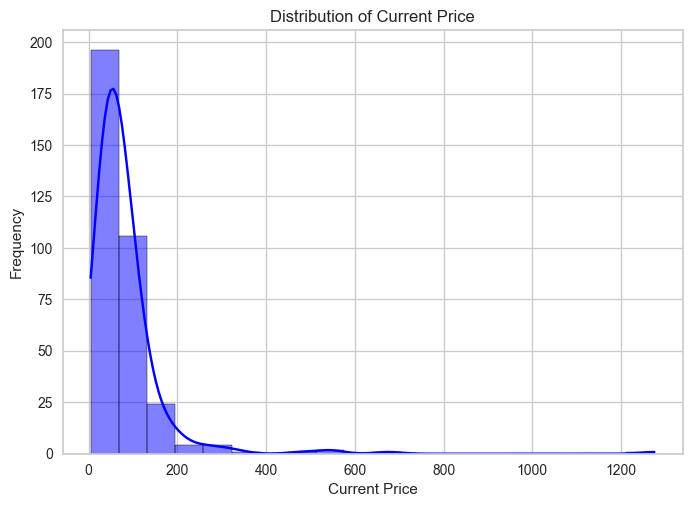

In [14]:
#Distribution plot of "Current Price"
sns.histplot(data['Current Price'], kde=True, bins=20, color='blue')
plt.title('Distribution of Current Price')
plt.xlabel('Current Price')
plt.ylabel('Frequency')
plt.show()

**Observations :** The distribution of Current Price is highly right-skewed, with the majority of stock prices concentrated below 200(dollars)


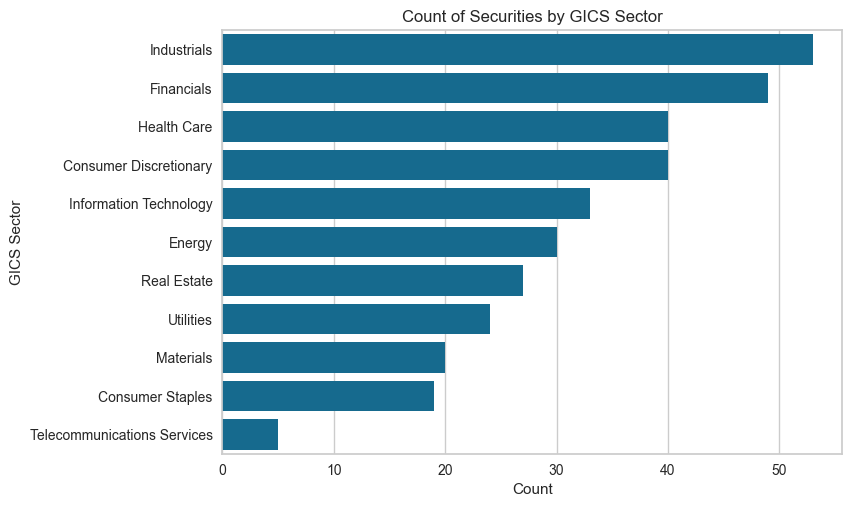

In [15]:
# Count plot for "GICS Sector"
sns.countplot(data=data, y='GICS Sector', order=data['GICS Sector'].value_counts().index)
plt.title('Count of Securities by GICS Sector')
plt.xlabel('Count')
plt.ylabel('GICS Sector')
plt.show()

**Observations :** Industrials have the most securities represented and followed by Financials sectors, while Telecommunications Services has the lowest. 


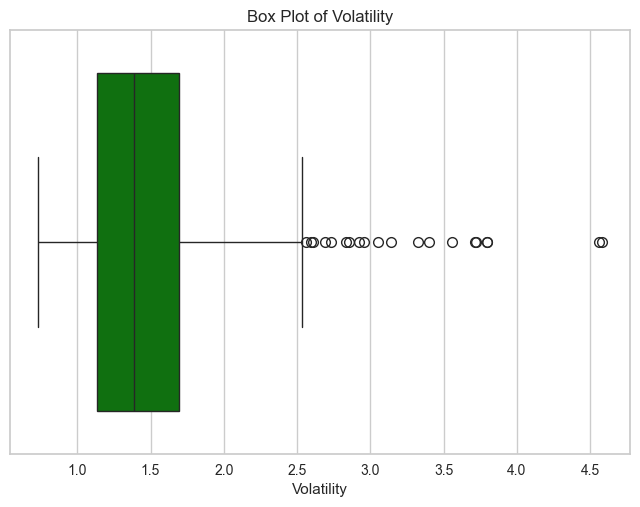

In [16]:
#Box plot of "Volatility"
sns.boxplot(data=data, x='Volatility', color='green')
plt.title('Box Plot of Volatility')
plt.xlabel('Volatility')
plt.show()


**Observations :** 
The box plot has the median volatility of around 1.3, with the interquartile range (IQR) of 1.2 to 1.7.  Several outliers are present beyond the upper whisker, which indicates the higher volatility.

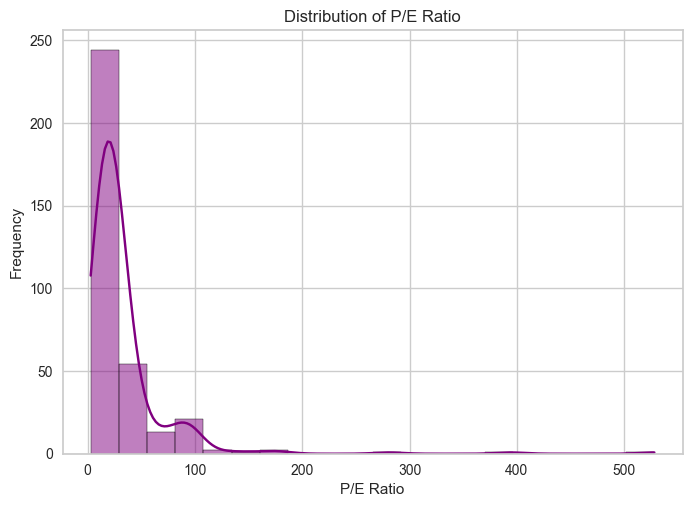

In [17]:
#Frequency distribution for "P/E Ratio"
sns.histplot(data['P/E Ratio'], bins=20, kde=True, color='purple')
plt.title('Distribution of P/E Ratio')
plt.xlabel('P/E Ratio')
plt.ylabel('Frequency')
plt.show()

**Observations :** The P/E ratio is right-skewed with more extreme values on the right side, with most stocks having low P/E ratio of less than 100.


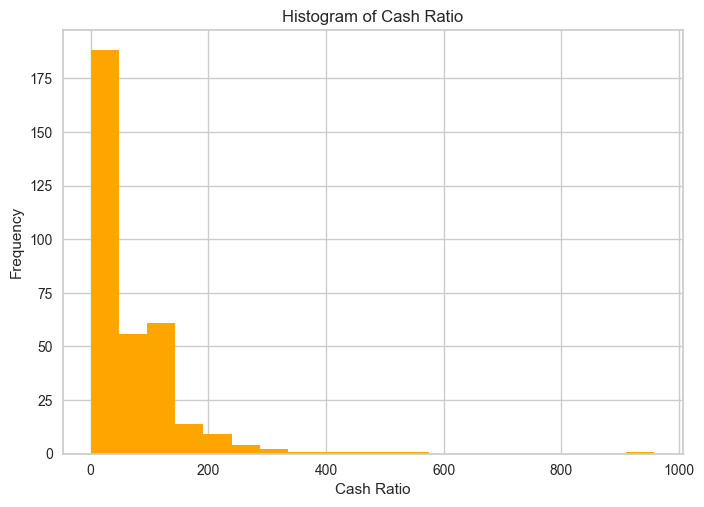

In [18]:
#Histogram of "Cash Ratio"
plt.hist(data['Cash Ratio'], bins=20, color='orange')
plt.title('Histogram of Cash Ratio')
plt.xlabel('Cash Ratio')
plt.ylabel('Frequency')
plt.show()

**Observations :** The cash ratio distribution is highly skewed, with a large proportion of companies holding very little cash relative to their liabilities and also A long tail indicates the presence of a few companies are holding high cash.


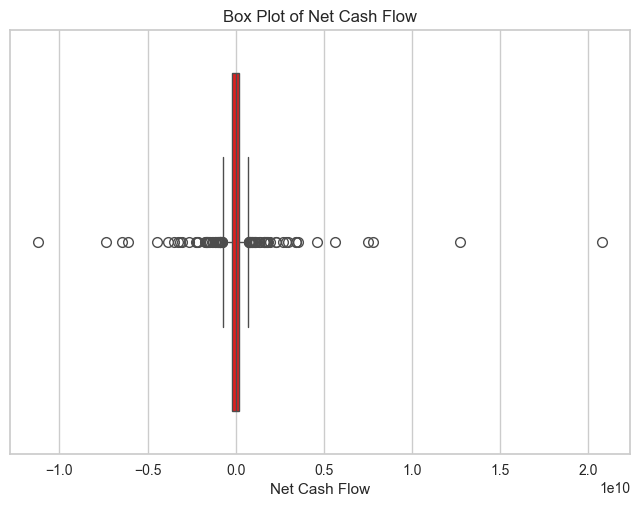

In [19]:
#Analysis of "Net Cash Flow" outliers
sns.boxplot(data=data, x='Net Cash Flow', color='red')
plt.title('Box Plot of Net Cash Flow')
plt.xlabel('Net Cash Flow')
plt.show()

**Observations :** The box plot of net cash flow indicates a narrow IQR and median is near zero and the presence of numerous extreme outliers on both ends highlights a wide range in net cash flow.

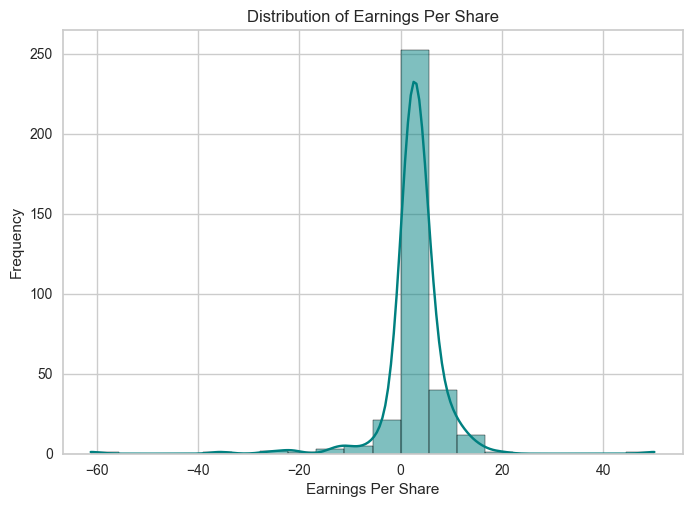

In [20]:
#Distribution of "Earnings Per Share"
sns.histplot(data['Earnings Per Share'], kde=True, color='teal', bins=20)
plt.title('Distribution of Earnings Per Share')
plt.xlabel('Earnings Per Share')
plt.ylabel('Frequency')
plt.show()

**Observations :** The distribution of Earnings Per Share is nearly normal with a slight negative skew, with most of the values
are present around zero. 

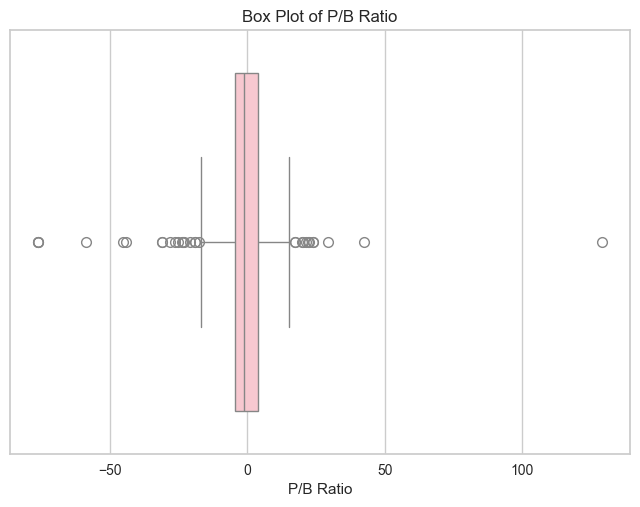

In [21]:
#boxplot of p/b ratio 
sns.boxplot(data=data, x='P/B Ratio', color='pink')
plt.title('Box Plot of P/B Ratio')
plt.xlabel('P/B Ratio')
plt.show()

**Observations :** The majority of P/B ratios are clustered around zero, with several outliers on right side indicates the distribution is rightly skewed with a negative median


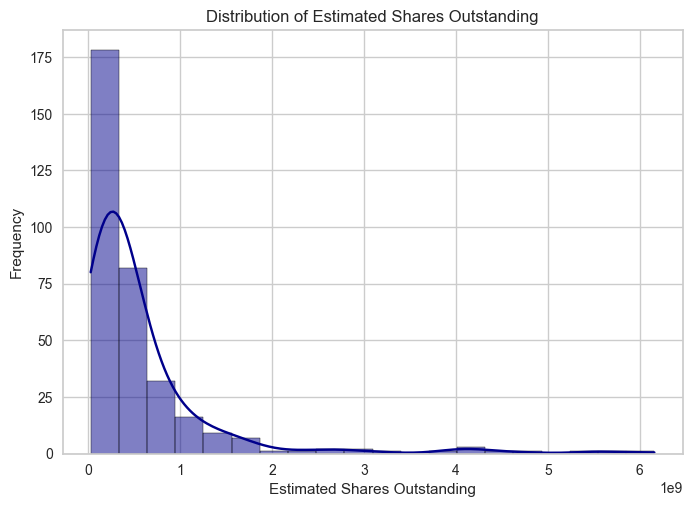

In [22]:
#Distribution of "Estimated Shares Outstanding"
sns.histplot(data['Estimated Shares Outstanding'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Estimated Shares Outstanding')
plt.xlabel('Estimated Shares Outstanding')
plt.ylabel('Frequency')
plt.show()

**Observations :**  The distribution of estimated shares outstanding is highly right-skewed, with most companies having a small number of shares and a few companies having an exceptionally large number of shares.

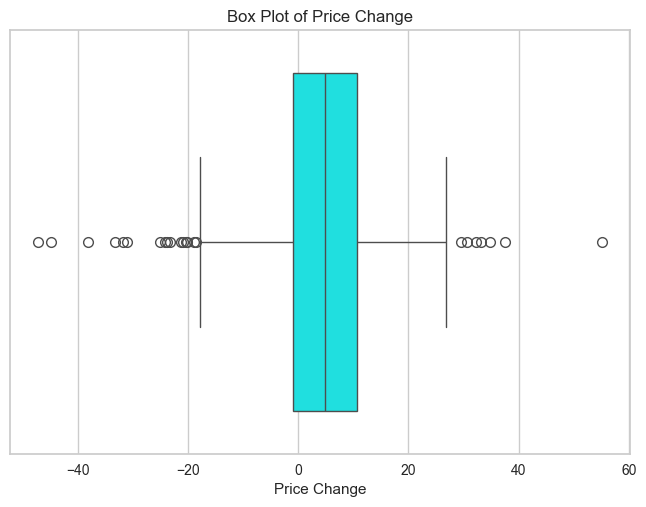

In [23]:
#Box plot of "Price Change"
sns.boxplot(data=data, x='Price Change', color='cyan')
plt.title('Box Plot of Price Change')
plt.xlabel('Price Change')
plt.show()

**Observations :** The box plot of price change indicates having a values beyond the left and right whishkers indicates a extreme values on both the sides and the median is near 10


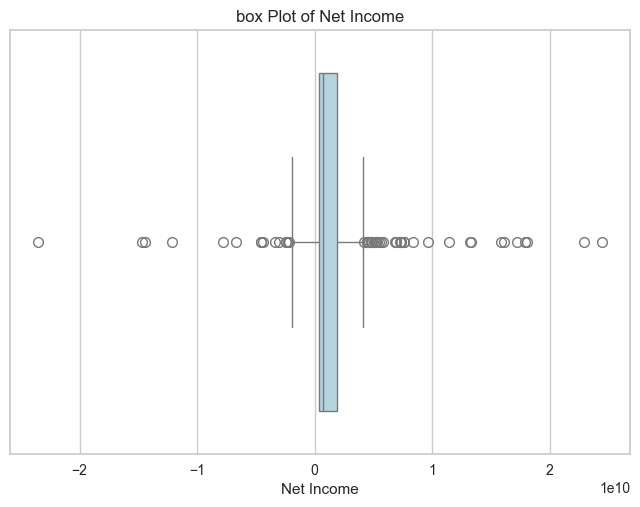

In [24]:
#Distribution of "Net Income" using a violin plot
sns.boxplot(data=data, x='Net Income', color='lightblue')
plt.title('box Plot of Net Income')
plt.xlabel('Net Income')
plt.show()

**Observations :** The box plot of Net Income median is near to zero with a interquartile range of nearly 0 to 0.4 and having a wide range of outliers on both the positive and negative ends indicate that some companies have larger profits or losses.


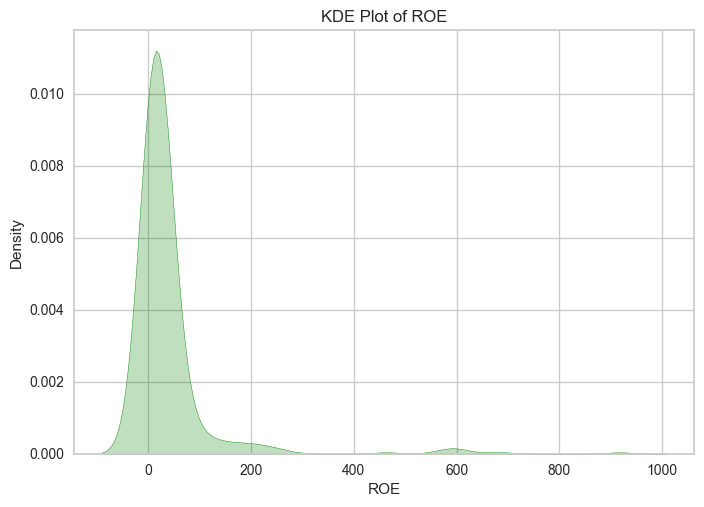

In [25]:
#Distribution of "ROE" with KDE
sns.kdeplot(data['ROE'], color='green', fill=True)
plt.title('KDE Plot of ROE')
plt.xlabel('ROE')
plt.ylabel('Density')
plt.show()

**Observations :** The KDE plot indicates that most of the companies is having ROE in between 0 to 100 and the distribution indicates rightly skewed suggests a few outliers which means high ROE.


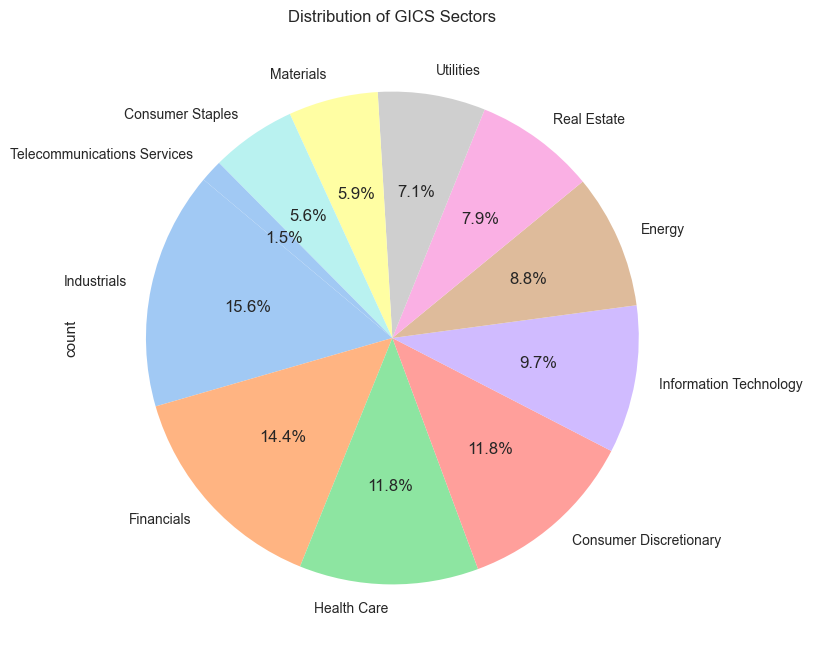

In [26]:
#Pie chart of "GICS Sector" distribution
sector_counts = data['GICS Sector'].value_counts()
plt.figure(figsize=(8, 8))
sector_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of GICS Sectors')
plt.show()

**Observations :** The pie chart reveals an uneven distribution across different sectors, with Industrials at the top and followed by Financials and Telecommunications Services having the smallest representation.


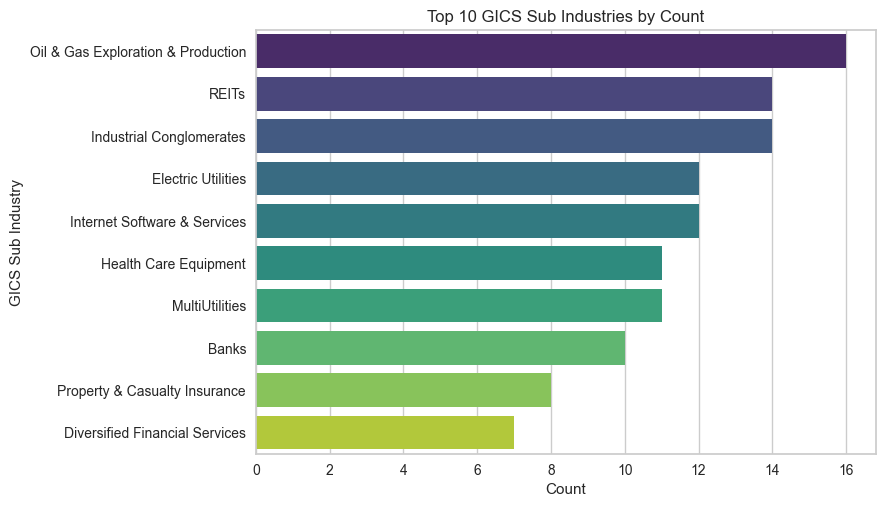

In [27]:
#top 10 most frequent "GICS Sub Industry"
top_10_sub_industries = data['GICS Sub Industry'].value_counts().nlargest(10)
sns.barplot(x=top_10_sub_industries, y=top_10_sub_industries.index, palette='viridis')
plt.title('Top 10 GICS Sub Industries by Count')
plt.xlabel('Count')
plt.ylabel('GICS Sub Industry')
plt.show()

**Observations :** The chart shows Oil & Gas Exploration & Production at the top, followed by REITs and Industrial Conglomerates and Diversified Financial Services at the last.

In [28]:
#Top 5 companies by highest Cash Ratio
top_5_cash_ratio = data.nlargest(5, 'Cash Ratio')[['Ticker Symbol', 'Cash Ratio']]
print("\nTop 5 Companies by Highest Cash Ratio:\n", top_5_cash_ratio)


Top 5 Companies by Highest Cash Ratio:
     Ticker Symbol  Cash Ratio
125            FB         958
211          MNST         568
137           FTR         496
335          YHOO         459
318           WAT         425


**Observations :** These are the top 5 companies with high cash ratios, FB at the top with 958 and WAT at the 5th with 425.


### Bivariate Analysis

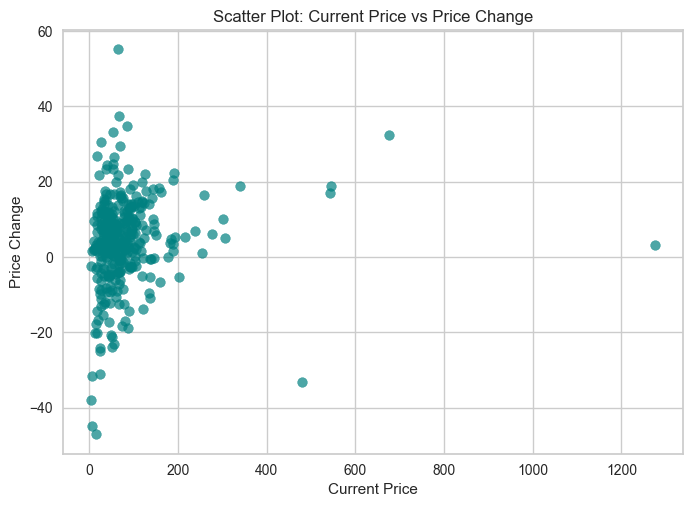

In [29]:
#Scatter plot of Current Price vs Price Change
plt.scatter(data['Current Price'], data['Price Change'], alpha=0.7, color='teal')
plt.title('Scatter Plot: Current Price vs Price Change')
plt.xlabel('Current Price')
plt.ylabel('Price Change')
plt.show()

**Observations :** The scatter plot shows a positive relationship between current price and price change, with few outliers and the data suggests that most stocks have low prices and small price changes.


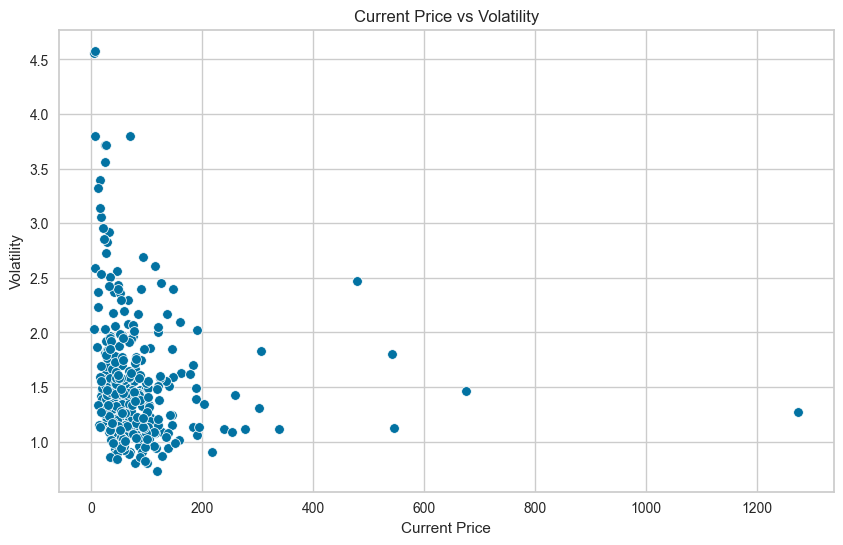

In [30]:
#Current Price vs Volatility
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Current Price', y='Volatility')
plt.title('Current Price vs Volatility')
plt.show()

**Observations :** The scatter plot shows no linear correlation between current price and volatility.


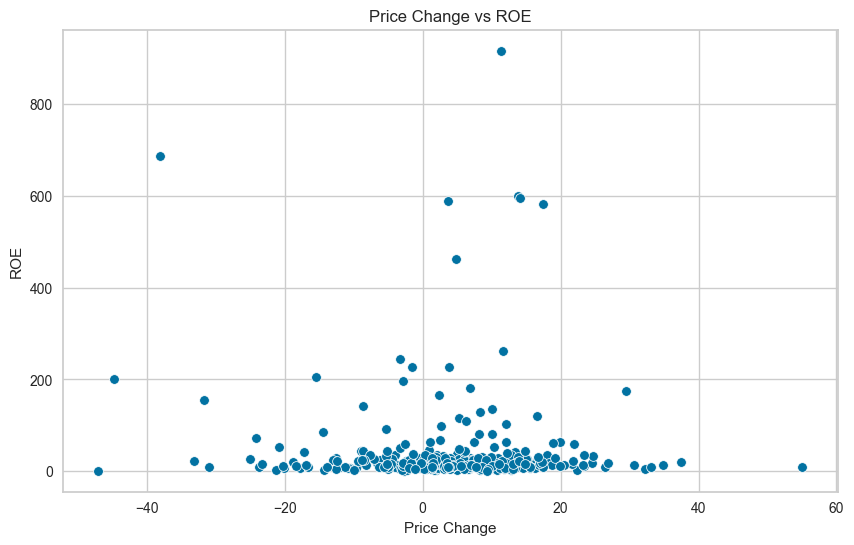

In [31]:
#price change vs roe
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Price Change', y='ROE')
plt.title('Price Change vs ROE')
plt.show()

**Observations :** The scatter plot shows no clear correlation between price change and ROE. While many stocks present around zero. 

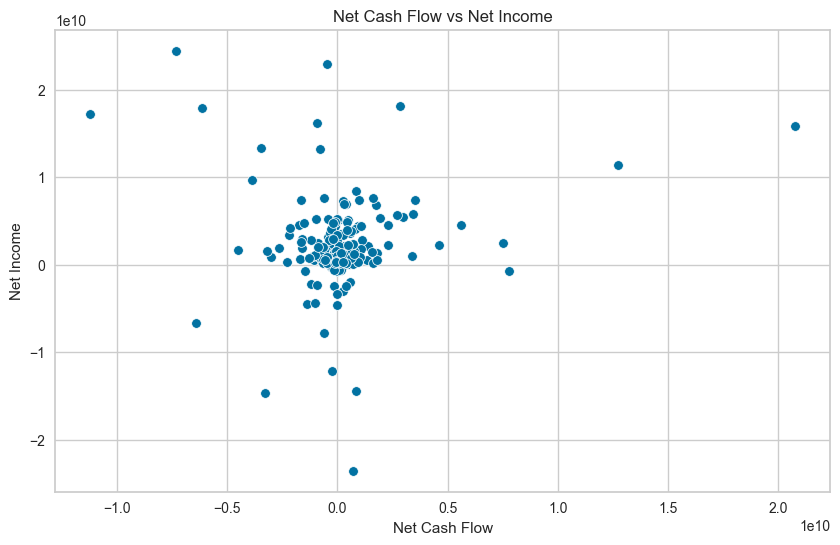

In [32]:
#net cashflow vs net income
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Net Cash Flow', y='Net Income')
plt.title('Net Cash Flow vs Net Income')
plt.show()


**Observations :** The scatter plot shows no strong correlation between net cash flow and net income.  While many companies have low values for both net cash flow and net income and most of the companies are clustered near zero for both the metrics


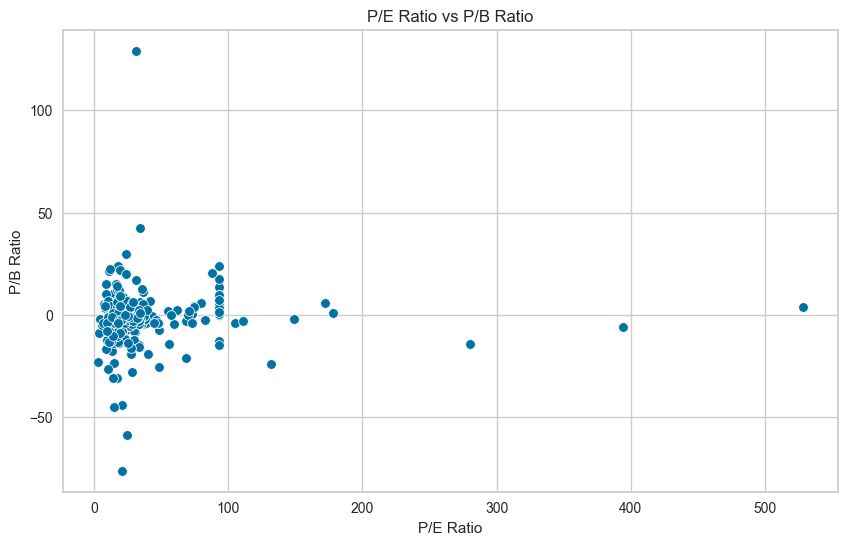

In [33]:
#p/e ratio vs p/b ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='P/E Ratio', y='P/B Ratio')
plt.title('P/E Ratio vs P/B Ratio')
plt.show()

**Observations :**
The scatter plot shows no clear linear relationship between P/E and P/B ratios, and many stocks have low values for both, P/B ratio and P/E Ratio, with few outliers.

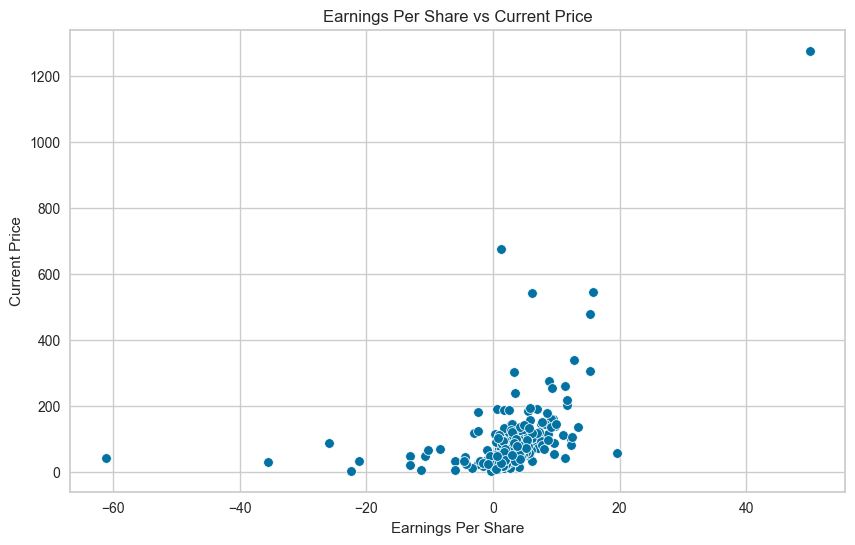

In [34]:
#earnings per share vs current price
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Earnings Per Share', y='Current Price')
plt.title('Earnings Per Share vs Current Price')
plt.show()


**Observations :** The scatter plot shows a positive relationship between EPS and current price, which indicates that higher EPS is associated with higher prices.

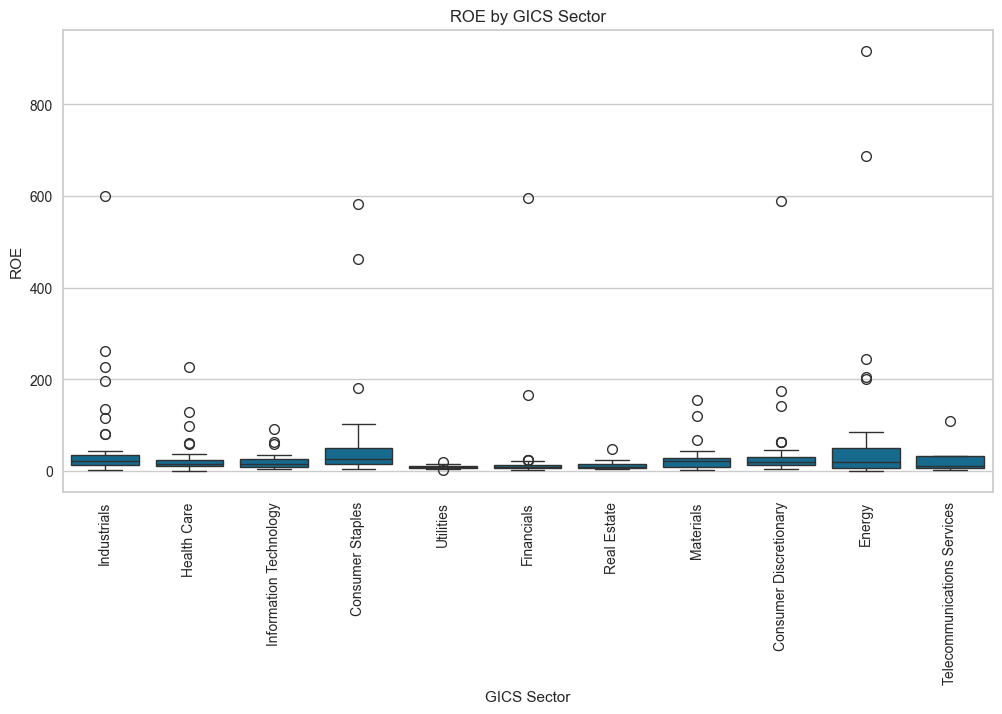

In [35]:
#roe vs gics sector
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='GICS Sector', y='ROE')
plt.title('ROE by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :**
Industrials and Consumer Staples have higher median ROEs with outliers.  Utilities and Telecommunications Services have the lowest median ROEs followed by  Financials and Energy.  Most sectors have some outliers which shows there are extreme values of ROE.

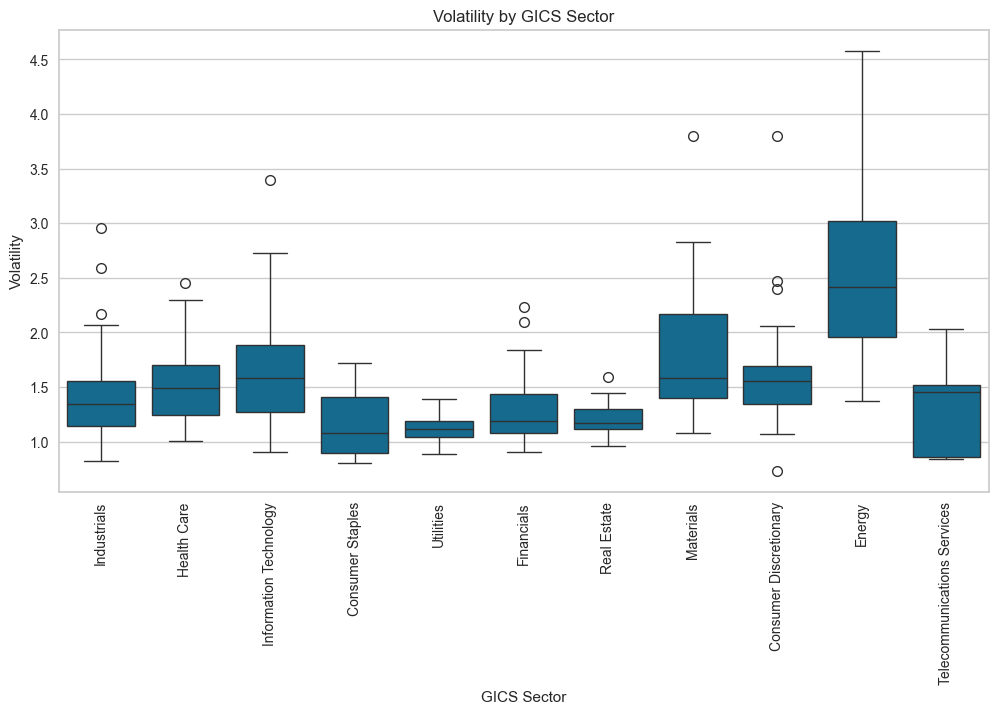

In [36]:
#volatility vs gics sector
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='GICS Sector', y='Volatility')
plt.title('Volatility by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :** The Energy sector has the highest median volatilities, Utilities and Consumer Staples have the lowest median volatilities, Outliers are present in most of the sectors, which indicates that most of the companies are having extreme volatilities.


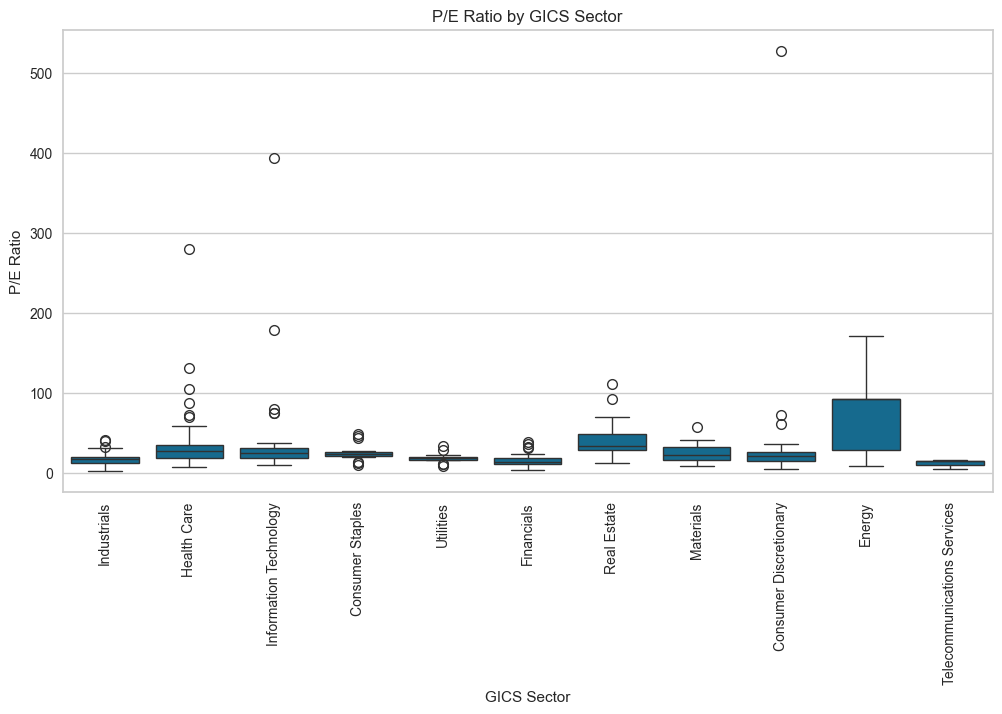

In [37]:
#p/e ratio vs gics sector
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='GICS Sector', y='P/E Ratio')
plt.title('P/E Ratio by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :** Telecommunications Services have lower median followed by Industrials, Consumer Staples, Utilities, Financials, with few outliers.Energy sector have higher medians followed by real estate and health care and more outliers.

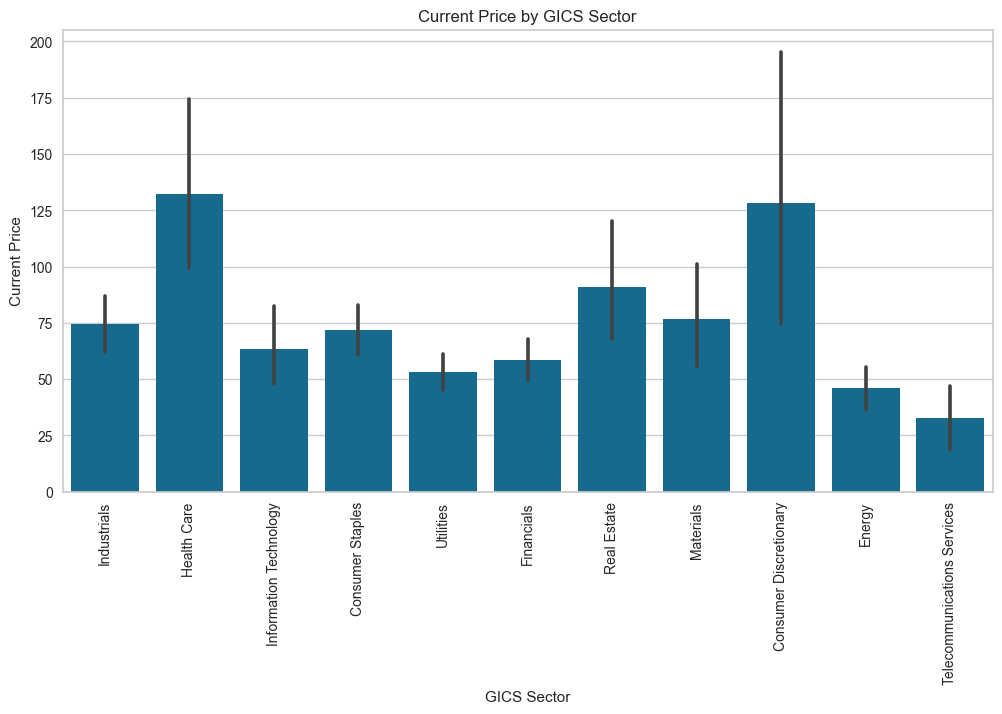

In [38]:
#current price vs gics sector
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='GICS Sector', y='Current Price')
plt.title('Current Price by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :** The health care has the highest current price followed by Consumer Discretionary and the telecommunication has the lowest current price followed by Energy.


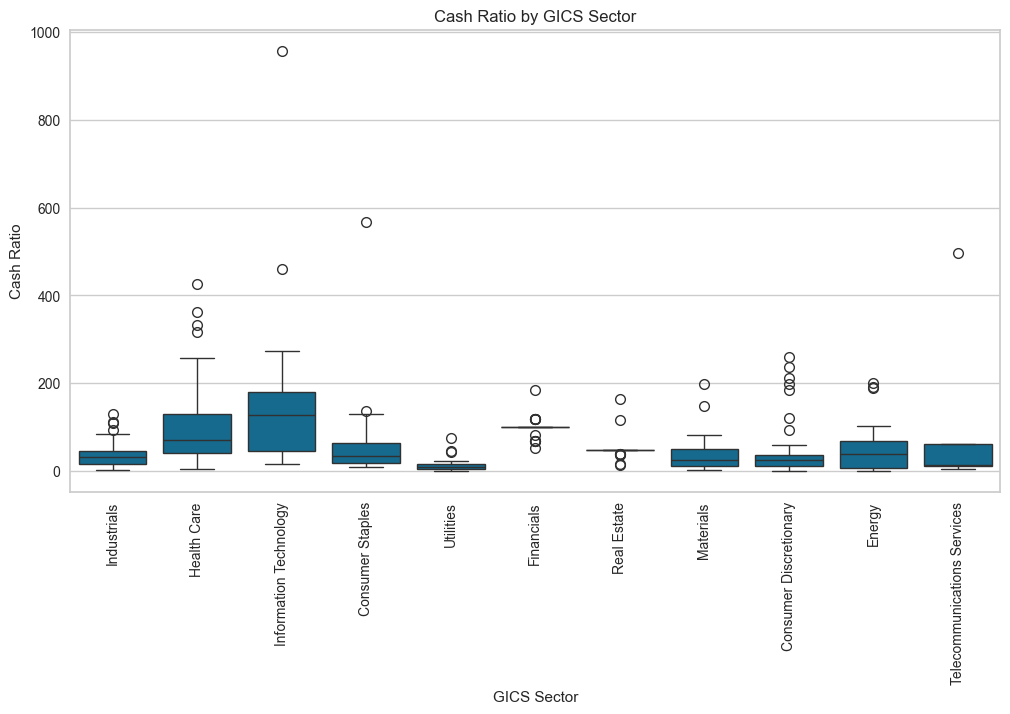

In [39]:
#cash ration vs gics sector
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='GICS Sector', y='Cash Ratio')
plt.title('Cash Ratio by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :** The information technology has the highest cash ratio median followed by health care and energy with some outliers. Utilities has the lowest cash ratio median followed by industrials with few outliers.


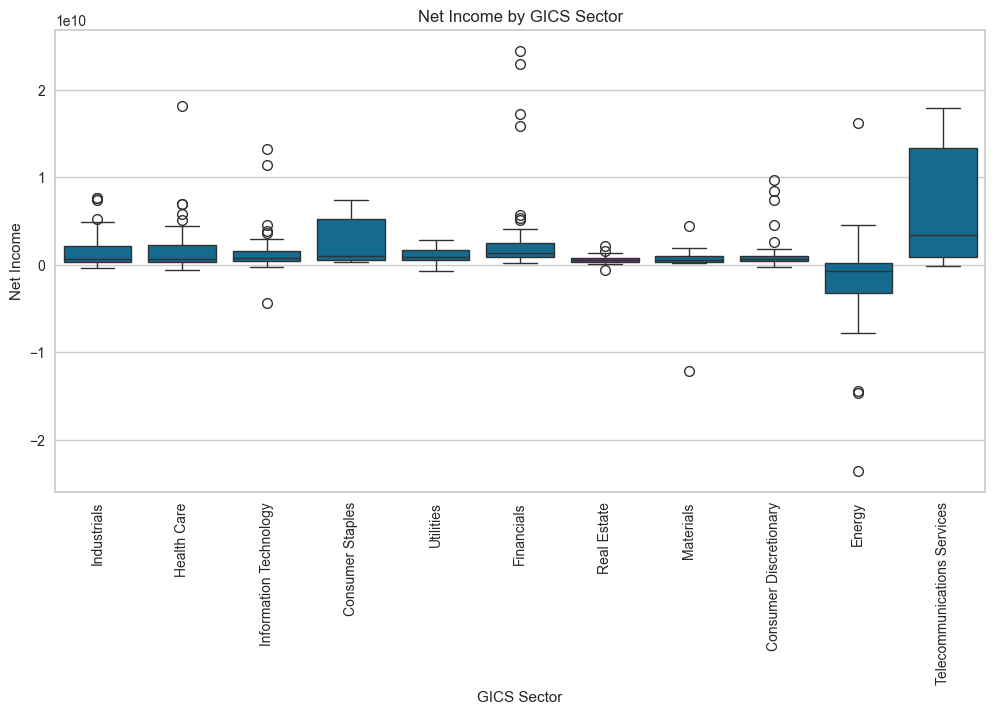

In [40]:
#net income vs gics sector
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='GICS Sector', y='Net Income')
plt.title('Net Income by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :** The telecommunication services has the highest median net income followed by consumer staples, while energy is having negative median net income with outliers on both the sides


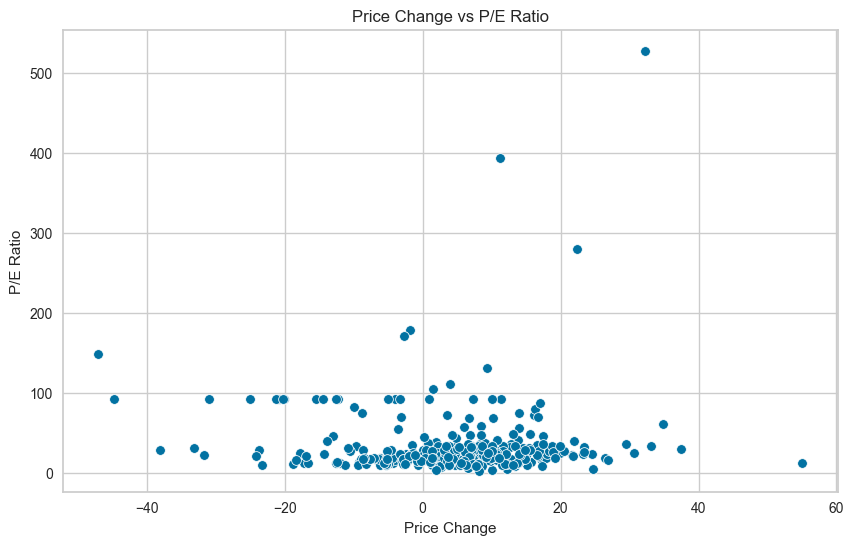

In [41]:
#price change vs p/e ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Price Change', y='P/E Ratio')
plt.title('Price Change vs P/E Ratio')
plt.show()

**Observations :** The plot shows that there is no linear relationship betweeen price change and p/e ration with most of the values are scattered ariund zero to 20 and with some outliers.


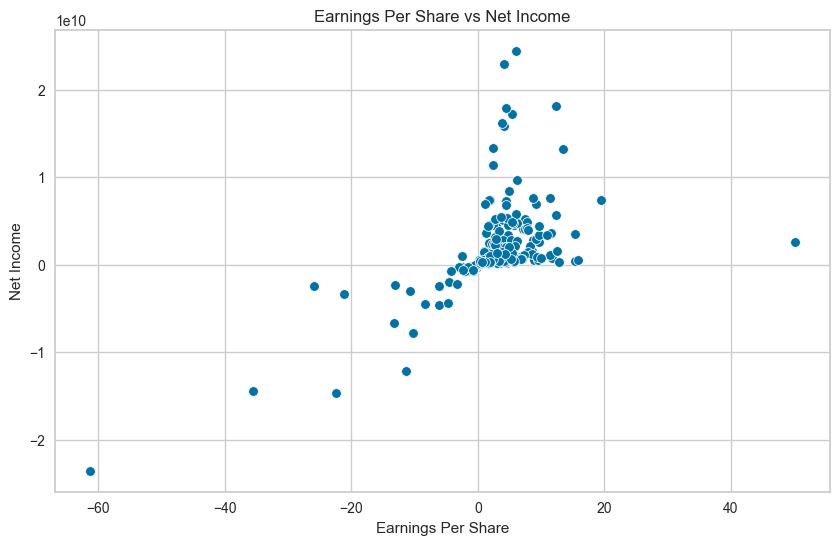

In [42]:
#earnings per share vs net income
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Earnings Per Share', y='Net Income')
plt.title('Earnings Per Share vs Net Income')
plt.show()

**Observations :** The plot shows a positive linear correlation between the earnings per share and net income with few outliers on both left and right side 


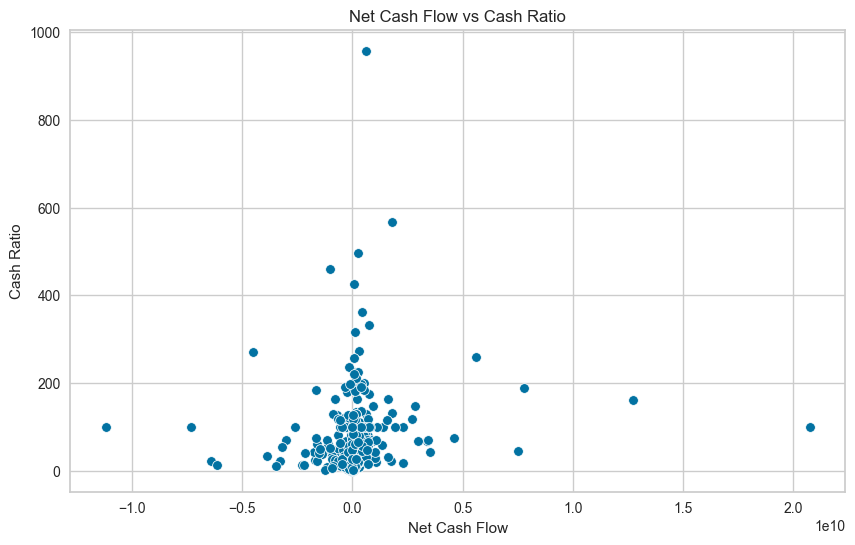

In [43]:
#net flow vs cash ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Net Cash Flow', y='Cash Ratio')
plt.title('Net Cash Flow vs Cash Ratio')
plt.show()

**Observations :** The plot shows that there is no linear relation between the net cash flow vs cash ratio and most of the points are scattered near zero with some of the outliers and many stocks have low values for both

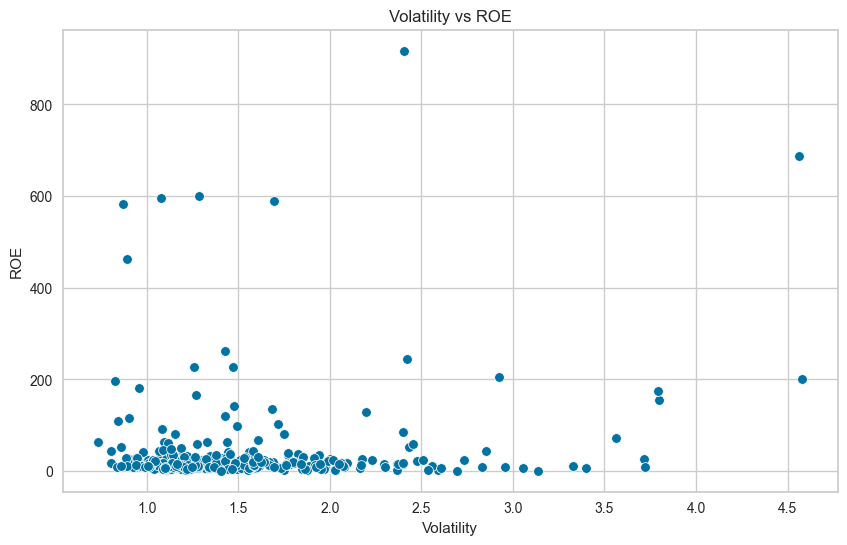

In [44]:
#volatility vs roe
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Volatility', y='ROE')
plt.title('Volatility vs ROE')
plt.show()

**Observations :** The plot shows that there is no linear relation between the volatility vs ROE and most of the points are scattered in between  1 and 1.5


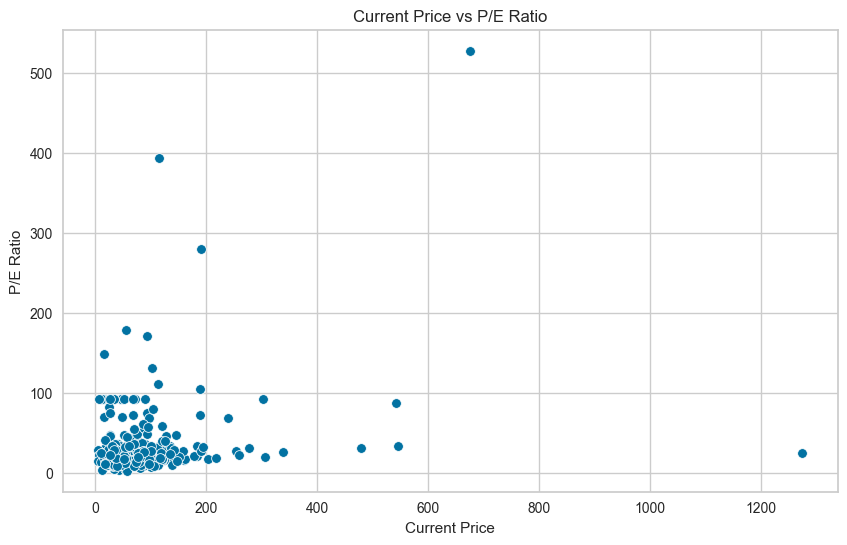

In [45]:
#current price vs p/e ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Current Price', y='P/E Ratio')
plt.title('Current Price vs P/E Ratio')
plt.show()


**Observations :** The scatter plot shows no strong correlation between current price and P/E ratio. While many stocks have low values for both.


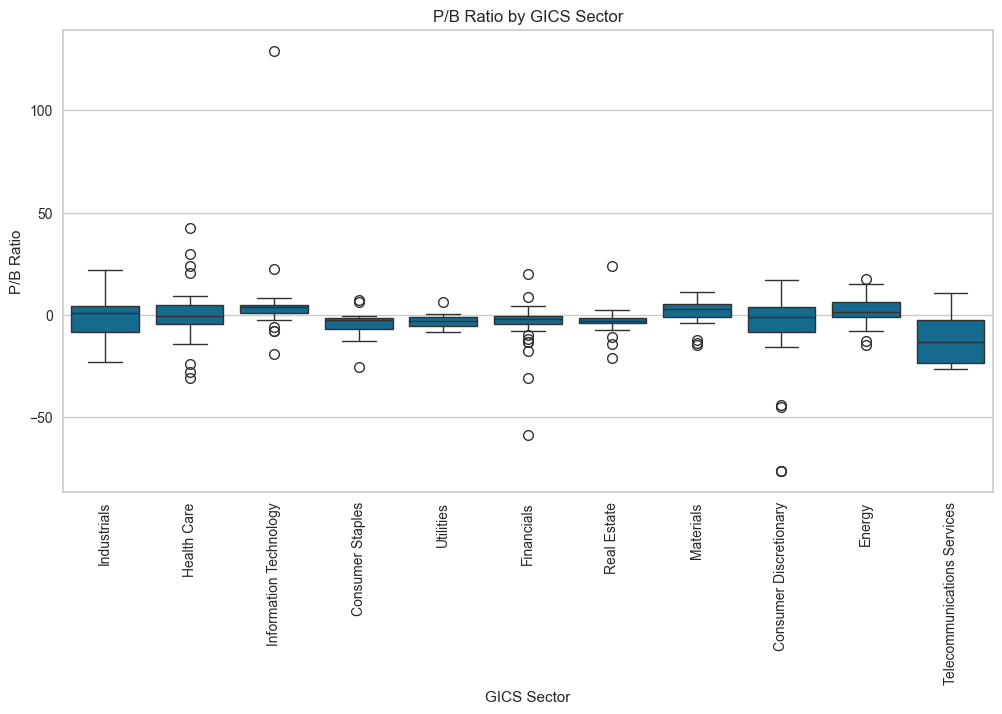

In [46]:
#p/b ratio vs gics sector
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='GICS Sector', y='P/B Ratio')
plt.title('P/B Ratio by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :** Materials has the highest median followed by information technology and most of the sectors have the negative p/b ratio with few outliers on both sides.


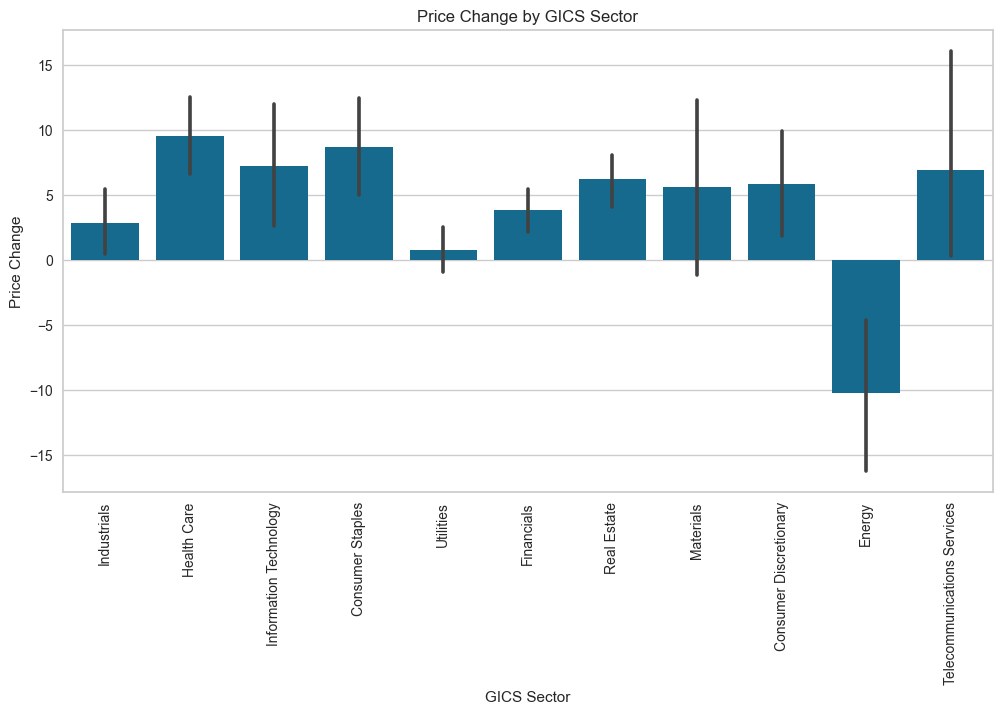

In [47]:
#price change vs gics sector
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='GICS Sector', y='Price Change')
plt.title('Price Change by GICS Sector')
plt.xticks(rotation=90)
plt.show()

**Observations :** Health care has the highest price change followed by consumer staples and energy has the negative price change followed by utilities.


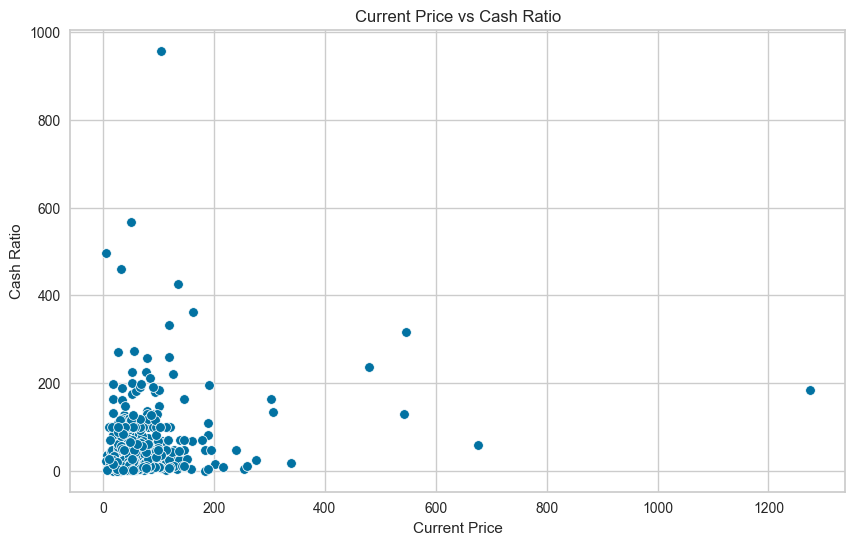

In [48]:
#current price vs cash ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Current Price', y='Cash Ratio')
plt.title('Current Price vs Cash Ratio')
plt.show()

**Observations :** The scatter plot shows no clear correlation between current price and cash ratio. with most of the values for both are scttered in between 0 to 100 and with few outliers


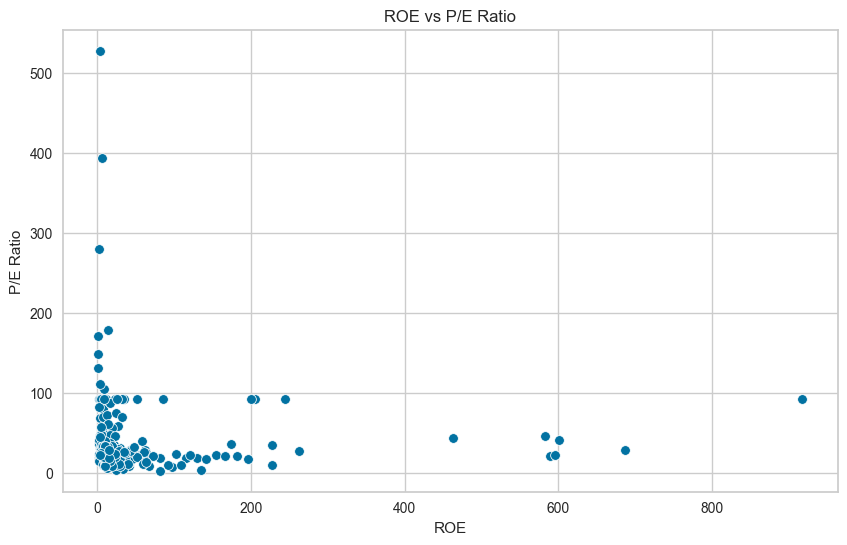

In [49]:
#roe vs p/b ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='ROE', y='P/E Ratio')
plt.title('ROE vs P/E Ratio')
plt.show()

**Observations :** There is no clear linear relationship between the roe and p/e ratio and most of the values are scatterd at zero with some outliers


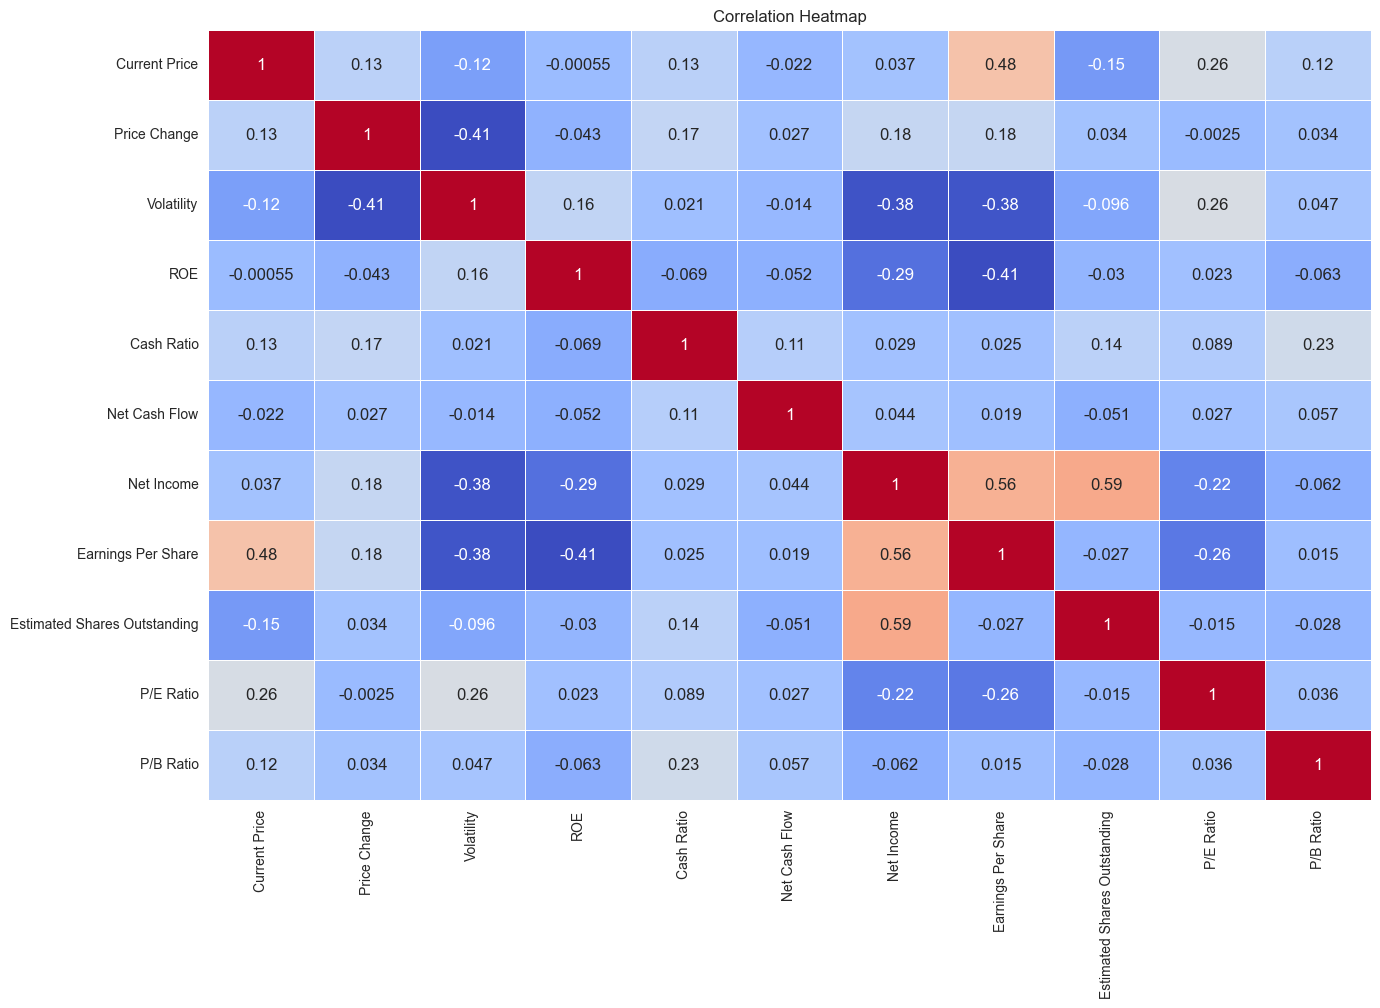

In [50]:
#heatmap for correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5,cbar=False)
plt.title('Correlation Heatmap')
plt.show()

**Observations :** There is strong positive correlation between Net income and estimated shares outstanding followed by net income and earnings per share ,price change and volatility has strongest negative correlation and followed by ROE and net income.

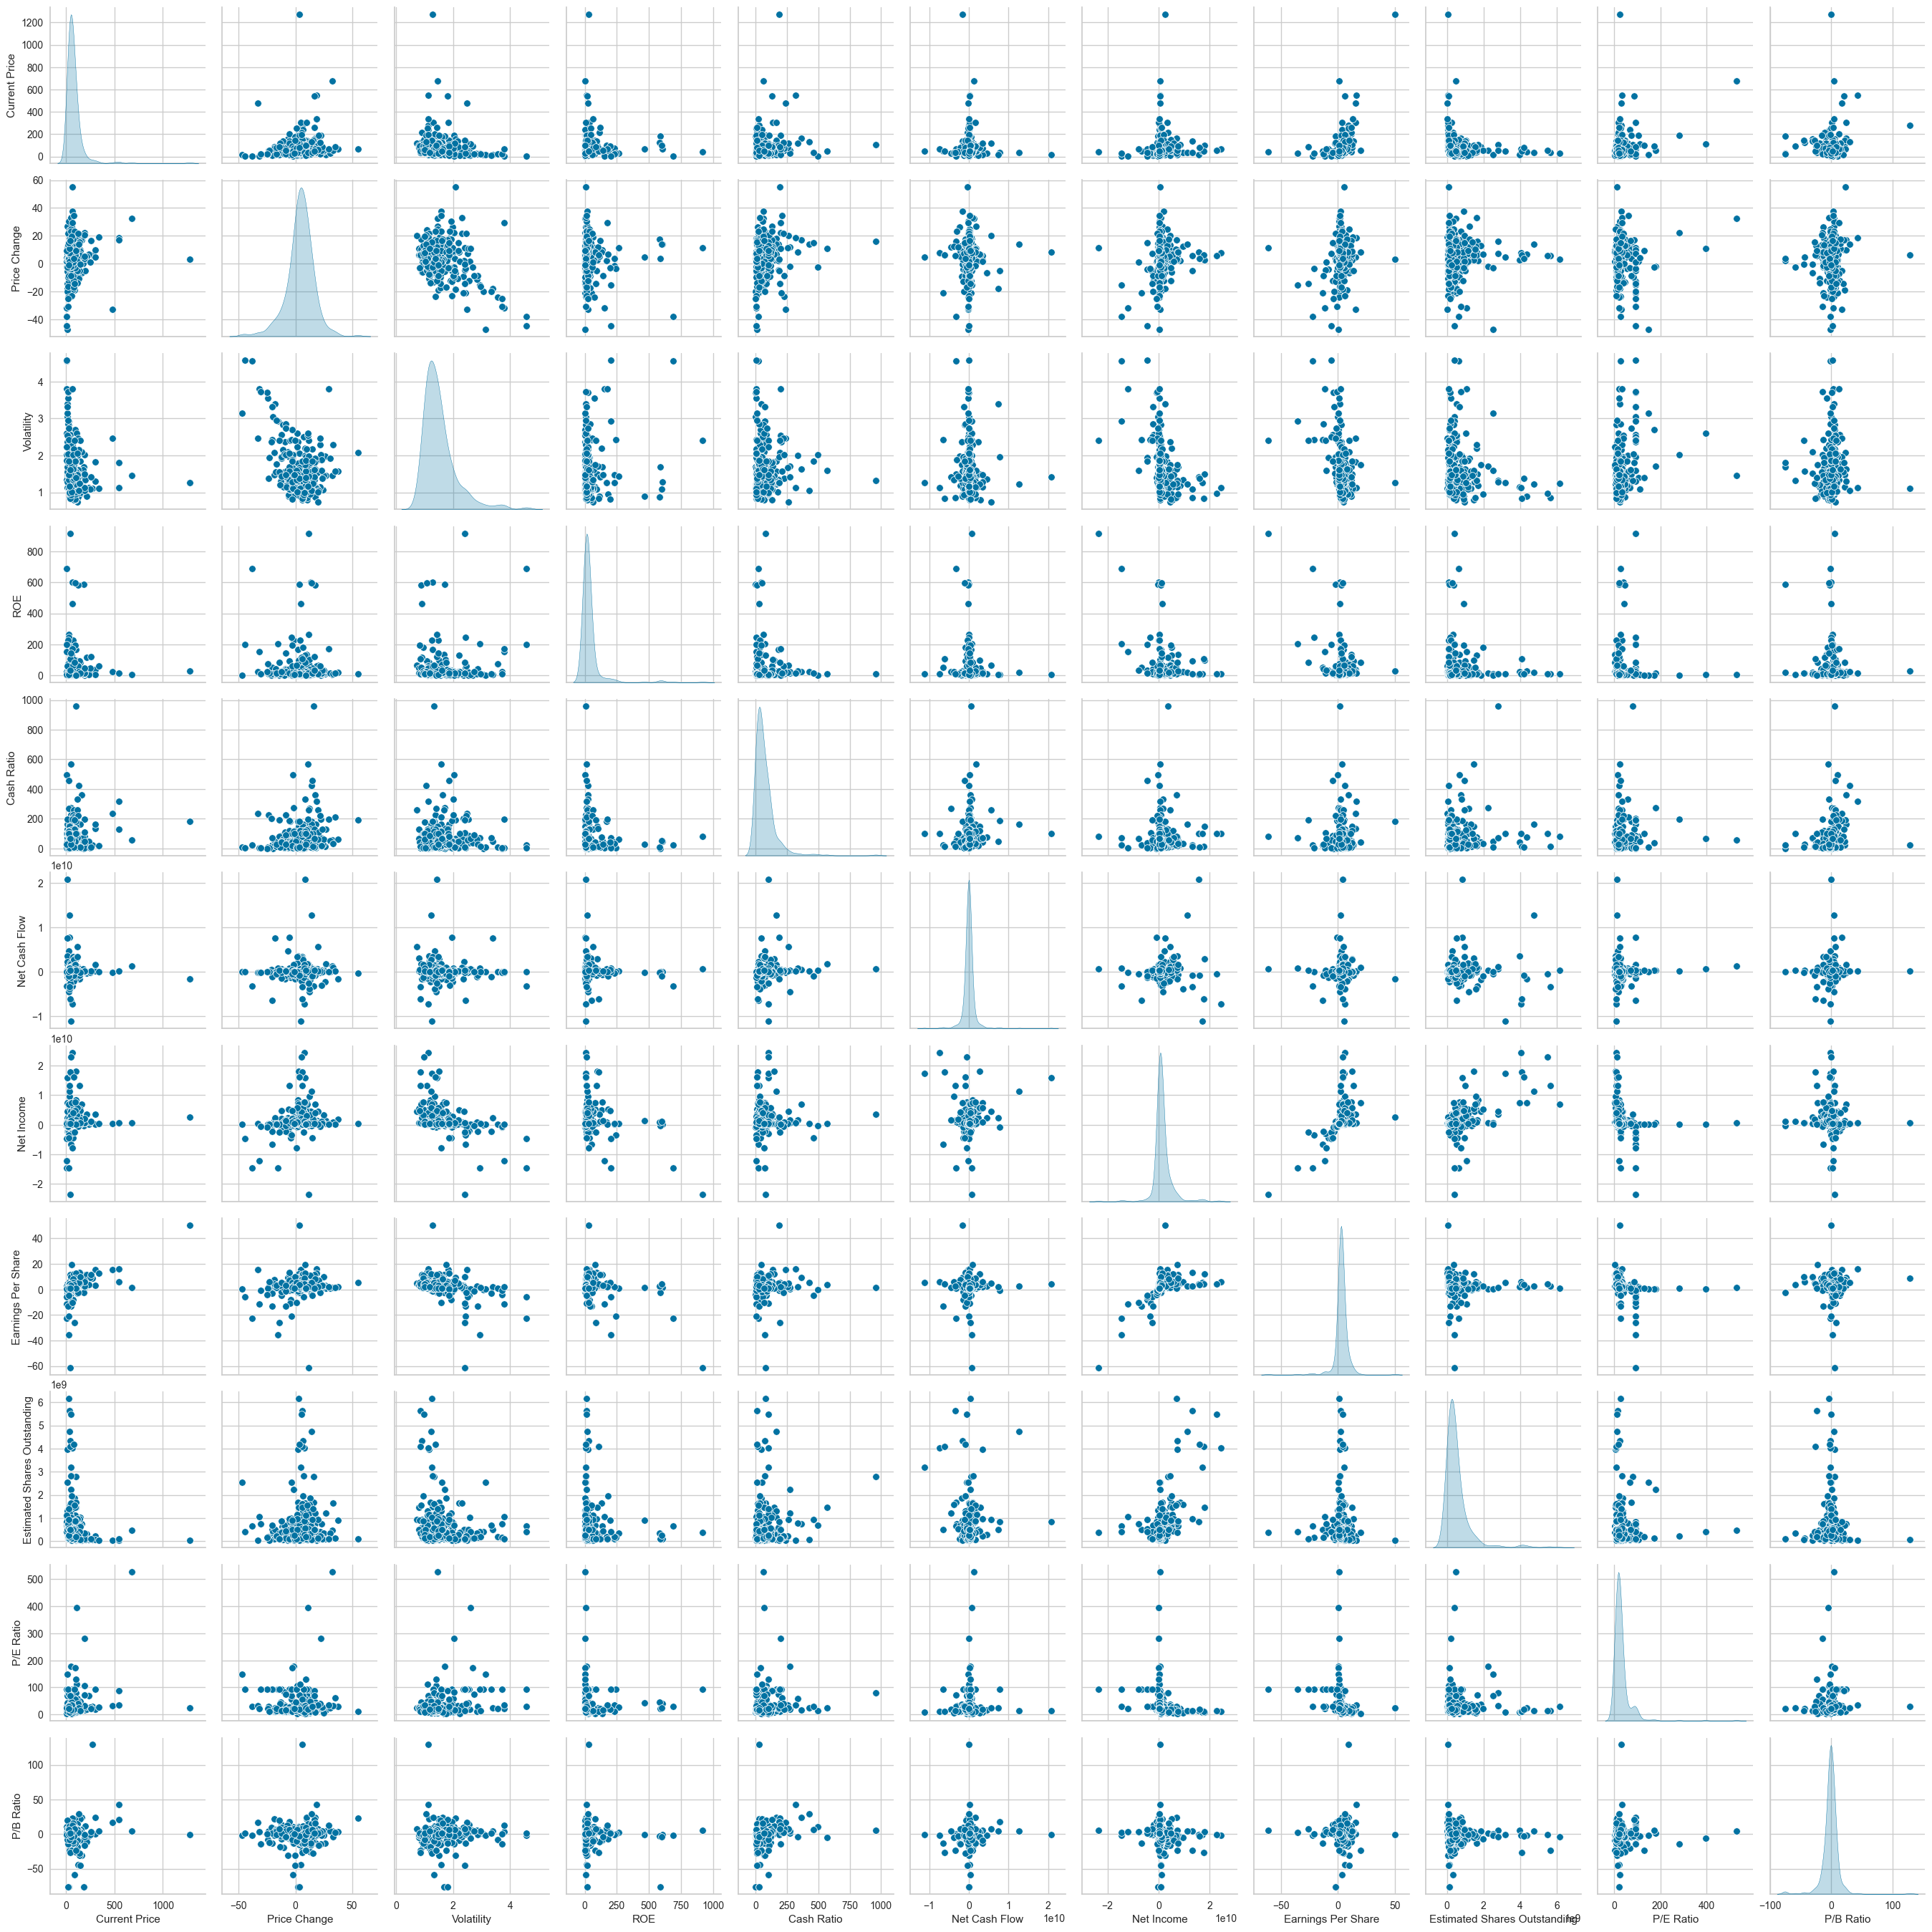

In [51]:
numerical_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 
    'Net Cash Flow', 'Net Income', 'Earnings Per Share', 
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

sns.pairplot(data[numerical_columns], diag_kind='kde', palette="viridis")
plt.show()

**Observations :**
- there is a positive correlation between current price and shares outstanding.
- There is a slight positive correlation between p/e ratio and current price
- Many variables shows no linear relationships with other variables.
- net cash flow , net income and estimated shares outstanding has a skewed distribution.
- there is a linear relationship between net income,earnings per share and roe.


## Data Preprocessing

### Outlier Check

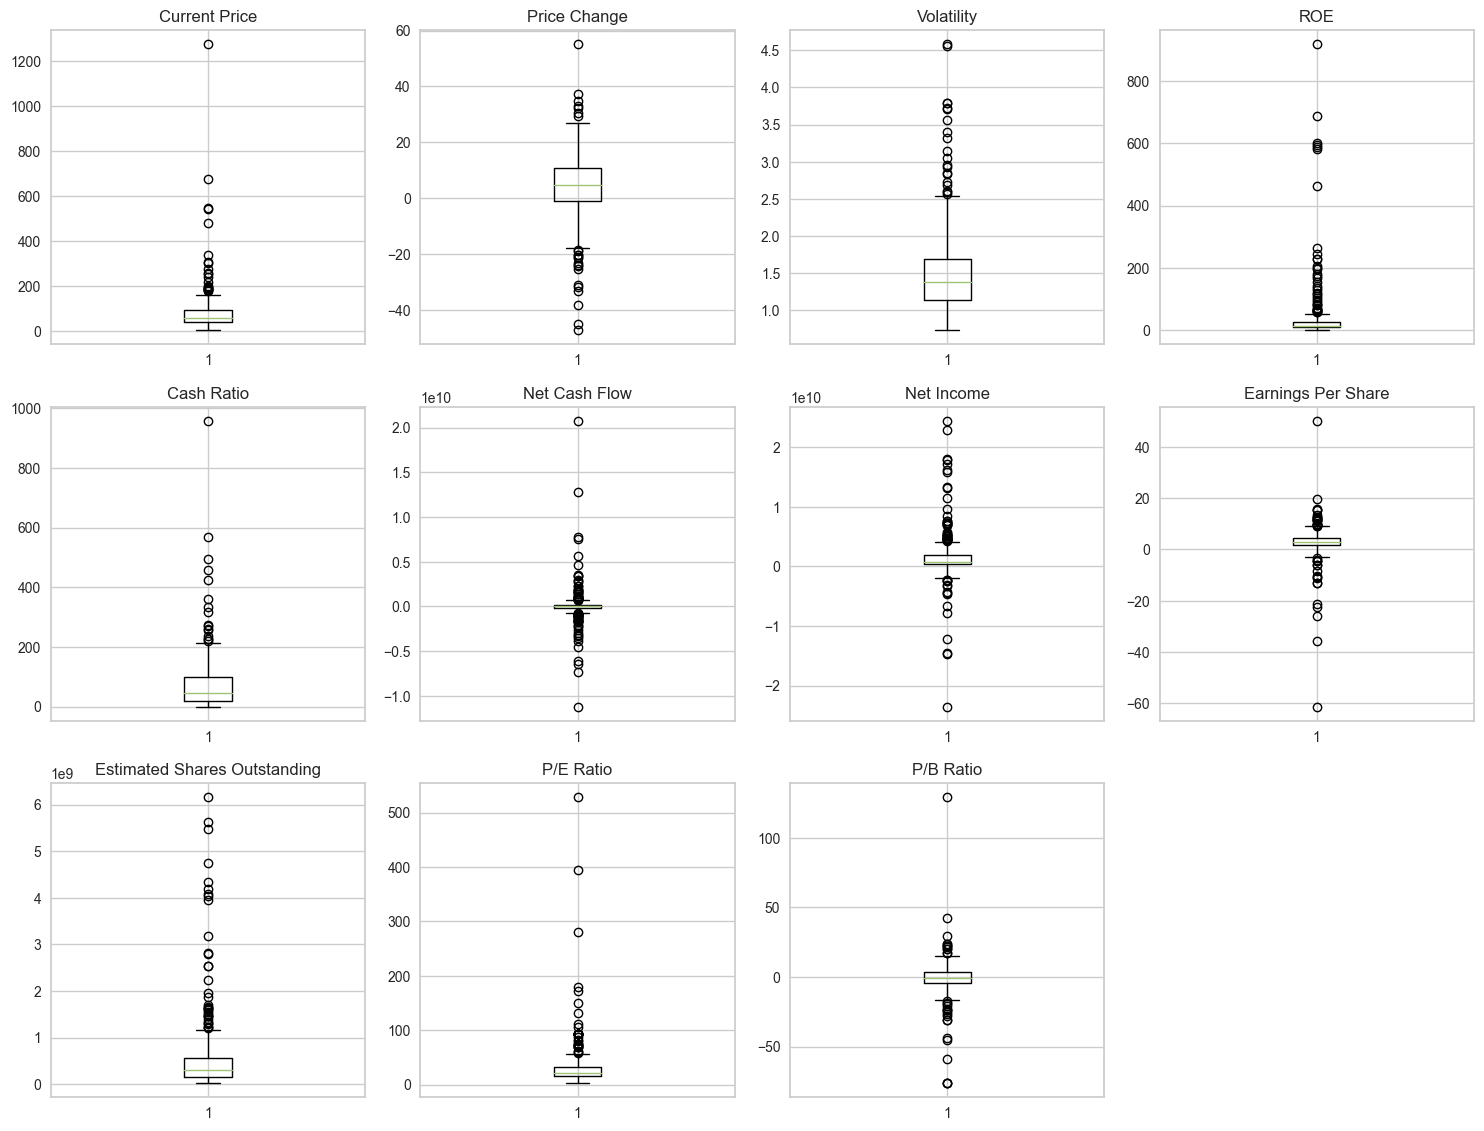

In [52]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Treating outliers

In [53]:
columns=['Current Price', 
    'Price Change', 
    'Volatility',
    'ROE',
    'Cash Ratio',
    'Net Cash Flow',
    'Net Income',
    'Earnings Per Share',
    'Estimated Shares Outstanding',
    'P/E Ratio',
    'P/B Ratio',
    'Cash Ratio']
def outliers(a):
    sorted(a)
    q1=np.percentile(a,25)
    q3=np.percentile(a,75)
    iqr=q3-q1
    min_limit=q1-(1.5*iqr)
    max_limit=q3+(1.5*iqr)
    a=np.where(a<min_limit,q1,a)
    a=np.where(a>max_limit,q3,a)
    return a
for i in columns:
    data[i]=outliers(data[i])

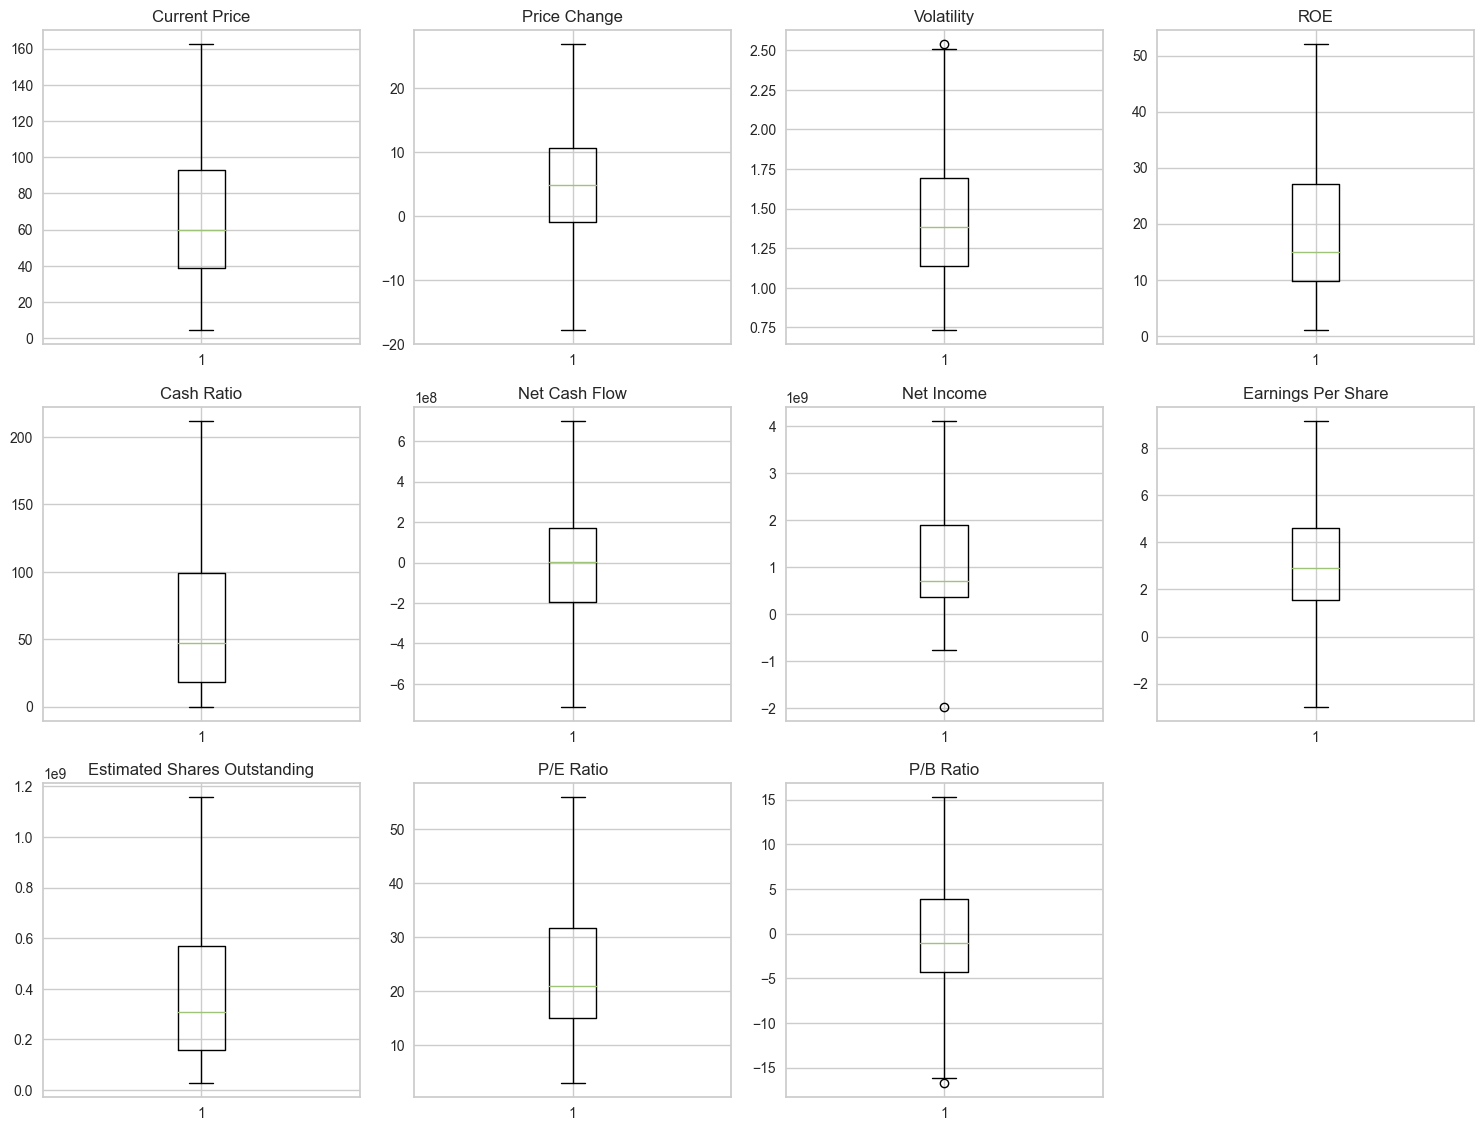

In [54]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [55]:
data1=data.copy()

#dropping columns as they are not necessary
data.drop(columns=["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"],inplace=True)

# Normalizing the numerical variables
num_columns = data.select_dtypes(include=[np.number]).columns.tolist()
copy_data=data.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Transform selected columns in X using the fitted scaler
data[num_columns] = scaler.fit_transform(data[num_columns])


## K-means clustering

Number of Clusters: 1 	Average Distortion: 3.2125034674846713
Number of Clusters: 2 	Average Distortion: 2.97095654431677
Number of Clusters: 3 	Average Distortion: 2.8321062269239032
Number of Clusters: 4 	Average Distortion: 2.7357185228428134
Number of Clusters: 5 	Average Distortion: 2.6810592384563825
Number of Clusters: 6 	Average Distortion: 2.6004865055407724
Number of Clusters: 7 	Average Distortion: 2.5372651334771987
Number of Clusters: 8 	Average Distortion: 2.5078479263316424
Number of Clusters: 9 	Average Distortion: 2.4701552342245643


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

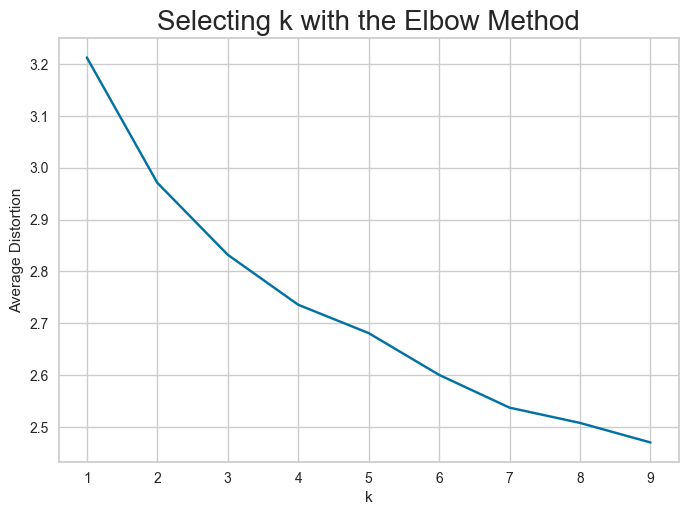

In [56]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(data)
    prediction = model.predict(data)
    distortion = (
        sum(
            np.min(cdist(data, model.cluster_centers_, "euclidean"), axis=1)
        )
        / data.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

### Checking the silhouette score

For n_clusters = 2, silhouette score is 0.13370583772825154
For n_clusters = 3, silhouette score is 0.11243256812786918
For n_clusters = 4, silhouette score is 0.11030617225757752
For n_clusters = 5, silhouette score is 0.08671326303974239
For n_clusters = 6, silhouette score is 0.09770357562061374
For n_clusters = 7, silhouette score is 0.0957607736570457
For n_clusters = 8, silhouette score is 0.08026848269258453
For n_clusters = 9, silhouette score is 0.09433320506276215


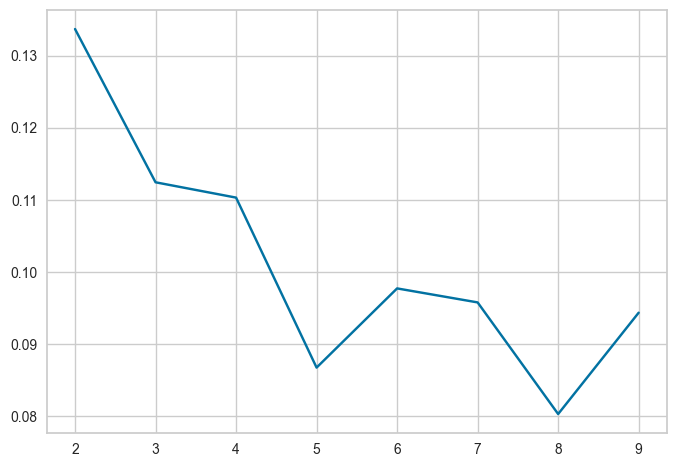

In [57]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((data))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

### selecting the best model


For selecting the best model we need to consider a model which have low distortion and high silhouette score from the above 2 visualizations for n_clusters=2 is having high silhouette score and for n=9 clusters have a less ditortion so the optimal k value will be k=2.

In [58]:
#k=2
k_means= KMeans(n_clusters=2)
k_means.fit(data)
labels=k_means.labels_

In [59]:
data1["clus_kmeans"]=labels

### Cluster Profiling

In [60]:
data1['clus_kmeans'].value_counts()

clus_kmeans
0    180
1    160
Name: count, dtype: int64

**Observations :**
- there are 180 data points which are related to cluster 0 and 160 points related to cluster 1

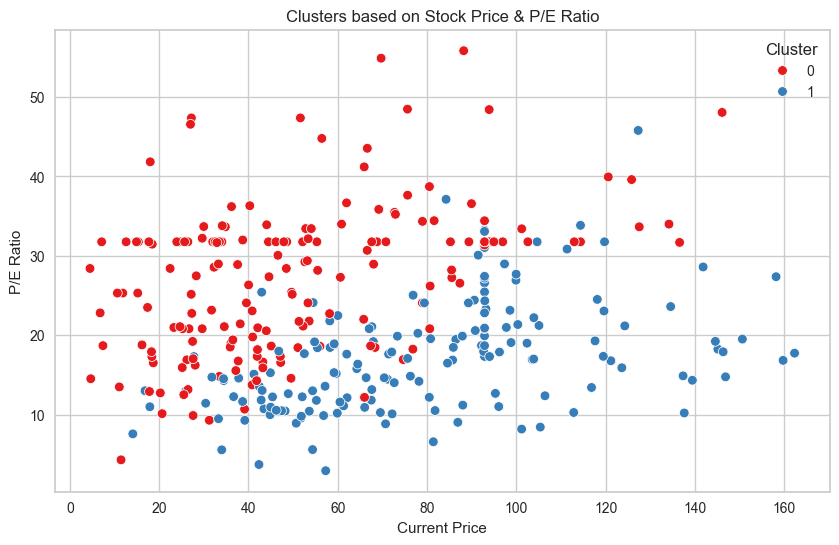

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data1["Current Price"], y=data1["P/E Ratio"], hue=data1["clus_kmeans"], palette="Set1")
plt.title("Clusters based on Stock Price & P/E Ratio")
plt.xlabel("Current Price")
plt.ylabel("P/E Ratio")
plt.legend(title="Cluster")
plt.show()

**Observations :**
- cluster (red) is characterized by relatively high "Current Prices" but lower "P/E Ratios.
- The other cluster (blue) exhibits lower "Current Prices" but higher "P/E Ratios."


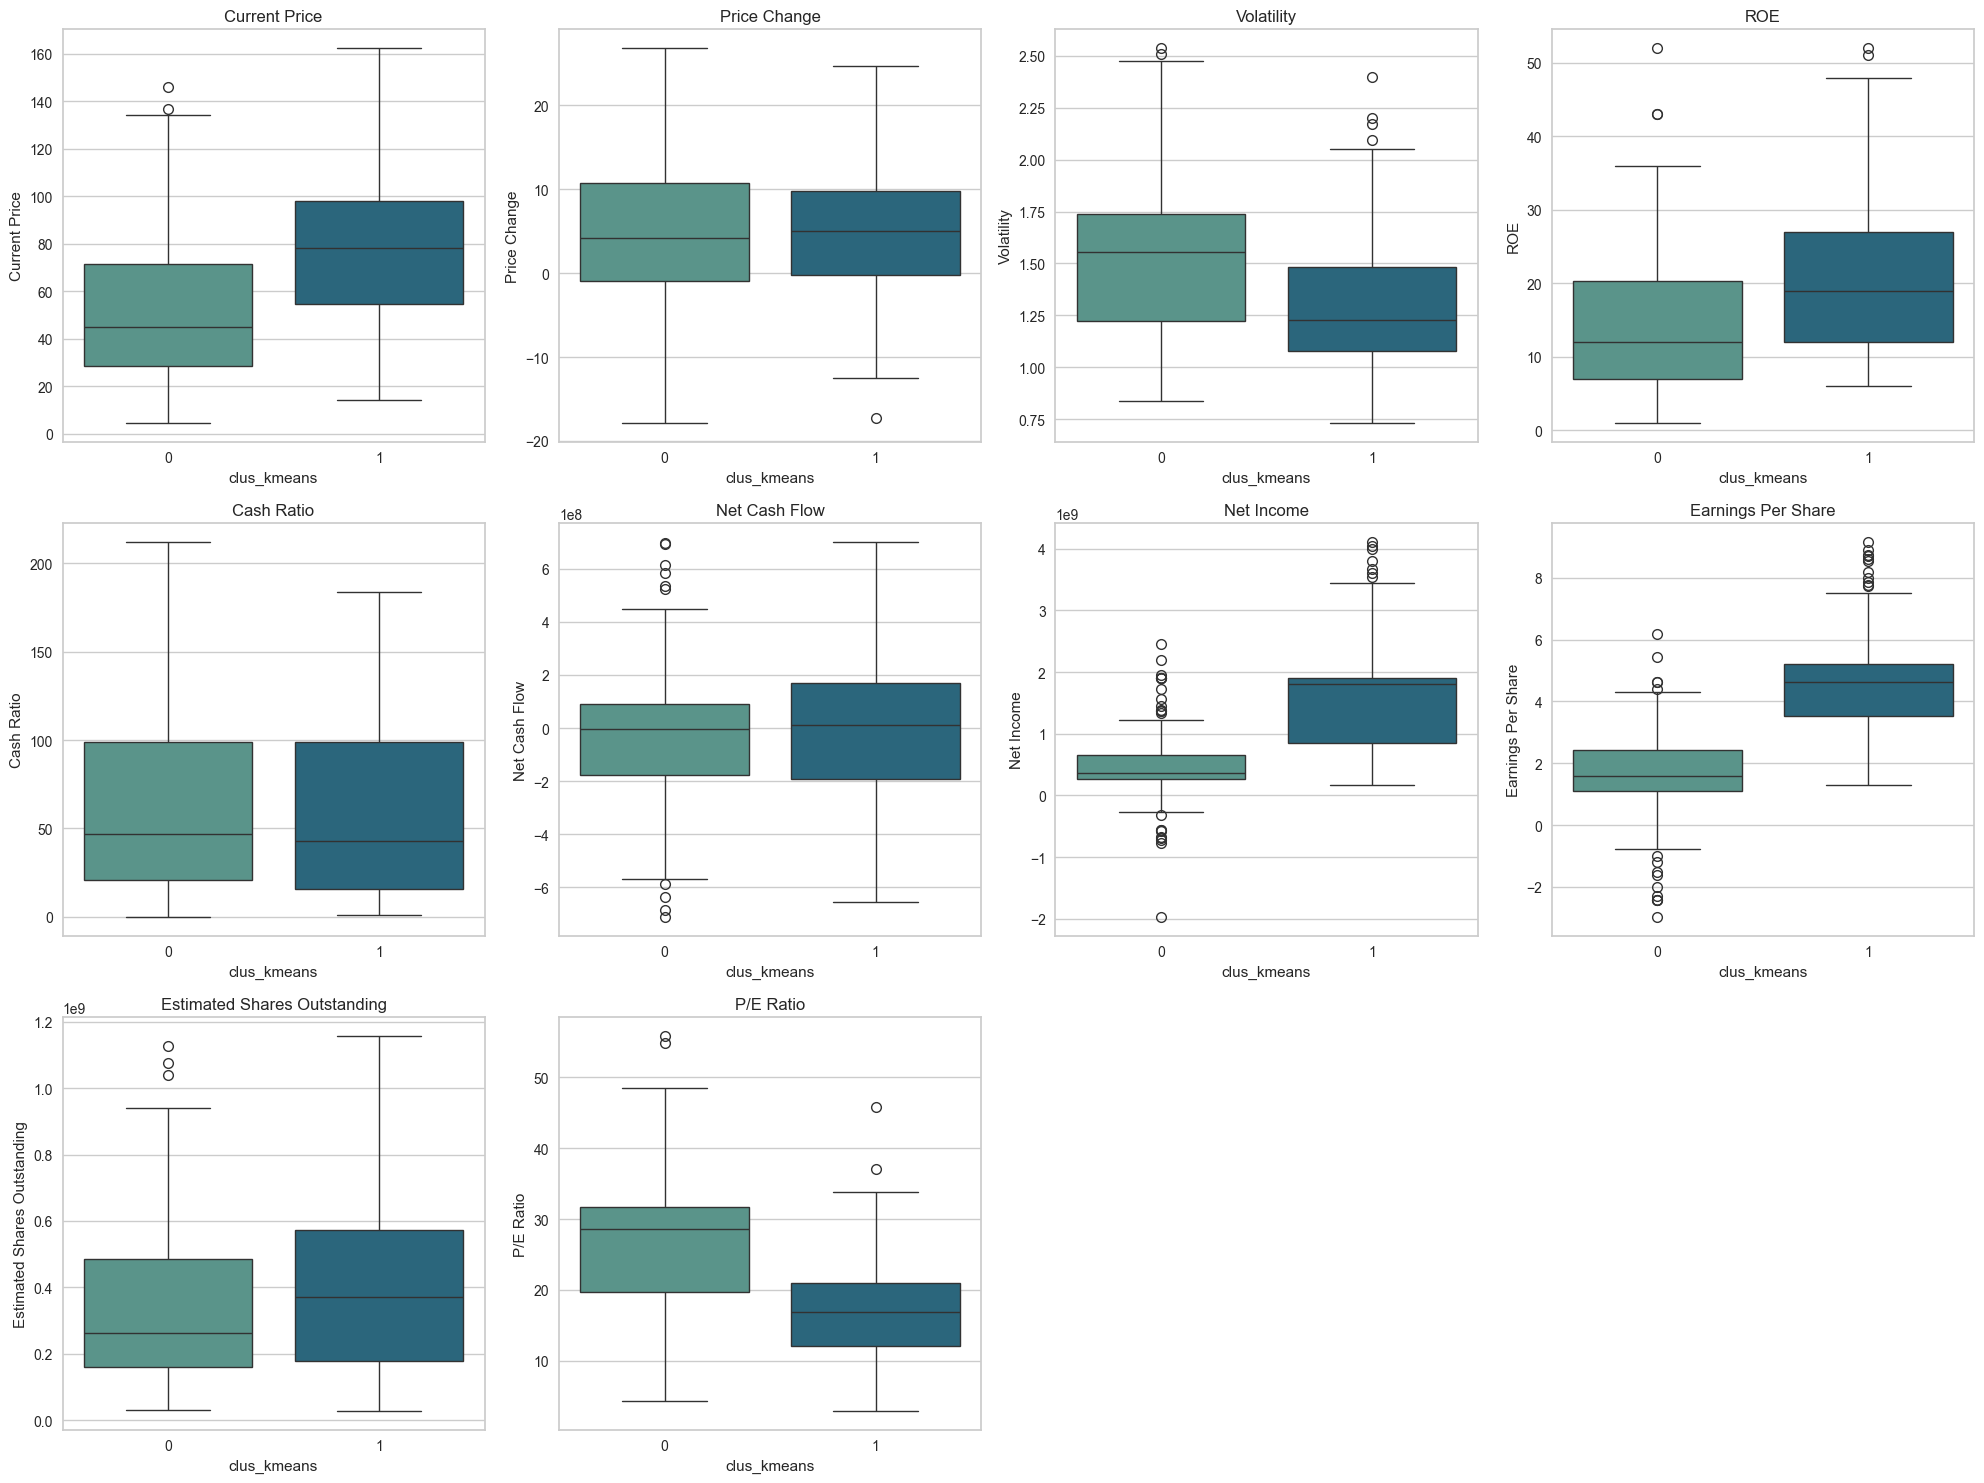

In [62]:
features = ["Current Price", "Price Change", "Volatility", "ROE", "Cash Ratio", "Net Cash Flow", "Net Income", "Earnings Per Share", "Estimated Shares Outstanding", "P/E Ratio"]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x="clus_kmeans", y=feature, data=data1,palette="crest")
    plt.title(feature)
plt.tight_layout()
plt.show()

**Observations :**
- Cluster 1 has a higher median current price than Cluster 0.  
-  Cluster 1 has higher variability in price change
- Cluster 1 shows a much higher median net income.
- Cluster 0 has more median earnings per share than cluster 1
- Cluster 0 has more median net income than cluster 1.
- cluster 0 has more median ROE than cluster 1

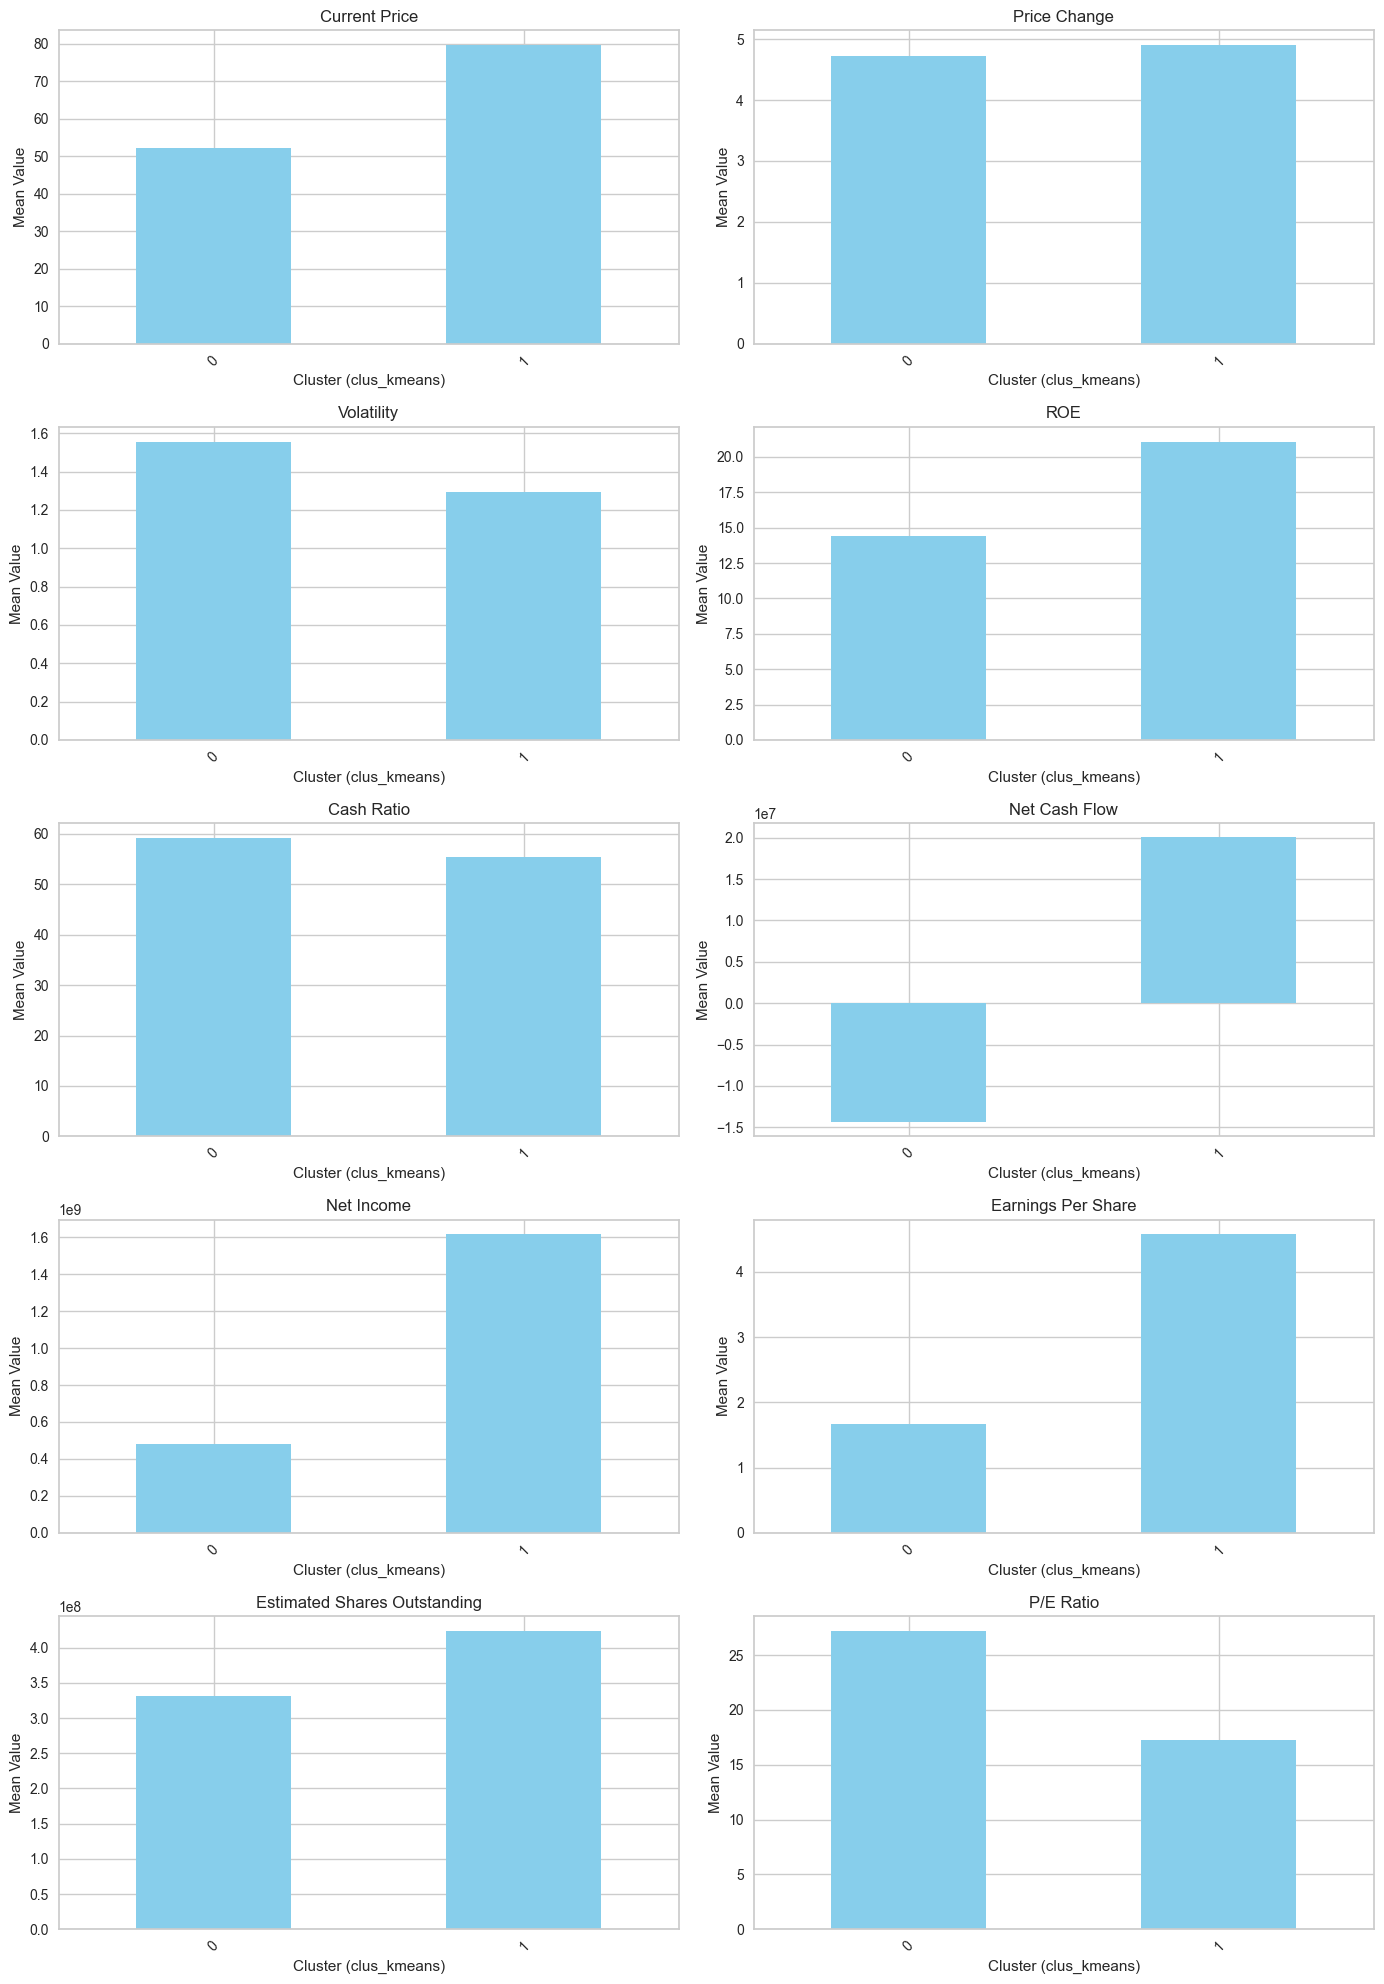

In [63]:
mean_data = data1.groupby("clus_kmeans")[[
    "Current Price", "Price Change", "Volatility", "ROE", "Cash Ratio", 
    "Net Cash Flow", "Net Income", "Earnings Per Share", 
    "Estimated Shares Outstanding", "P/E Ratio"
]].mean()

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  
axes = axes.flatten() 

features = [
    "Current Price", "Price Change", "Volatility", "ROE", "Cash Ratio", 
    "Net Cash Flow", "Net Income", "Earnings Per Share", 
    "Estimated Shares Outstanding", "P/E Ratio"
]

for i, feature in enumerate(features):
    mean_data[feature].plot(kind='bar', ax=axes[i], title=feature, color='skyblue')
    axes[i].set_ylabel('Mean Value')
    axes[i].set_xlabel('Cluster (clus_kmeans)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observations :** 
- Cluster 1 has a higher mean current price compared to Cluster 0
- The mean "Price Change" is slightly higher for Cluster 1 than cluster 0
- The mean "Volatility" is slightly higher for Cluster 1
- Cluster 1 has higher mean Return on Equity (ROE) than Cluster 0.
- Cluster 1 has a substantially higher mean net cash flow.

## Hierarchical clustering

### Checking Cophenetic Correlation

In [64]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.59839054551691.
Cophenetic correlation for Euclidean distance and complete linkage is 0.359871311536964.
Cophenetic correlation for Euclidean distance and average linkage is 0.6020655275845602.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.37580147378131595.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6056261609425319.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.3002629020842237.
Cophenetic correlation for Chebyshev distance and average linkage is 0.6018823659267848.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.3892814236692453.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5464771295767937.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.287056286991377.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.56379615522981.
Cophenetic correla

In [65]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6056261609425319, which is obtained with Chebyshev distance and single linkage.


#### Exploring linkage methods with chebyshev distance only

In [66]:
# list of linkage methods and ward and centroid wont work for centroid and ward linkages
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(data, metric="chebyshev", method=lm)
    c, coph_dists = cophenet(Z, pdist(data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6056261609425319.
Cophenetic correlation for complete linkage is 0.3002629020842237.
Cophenetic correlation for average linkage is 0.6018823659267848.
Cophenetic correlation for weighted linkage is 0.3892814236692453.


In [67]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6056261609425319, which is obtained with single linkage.


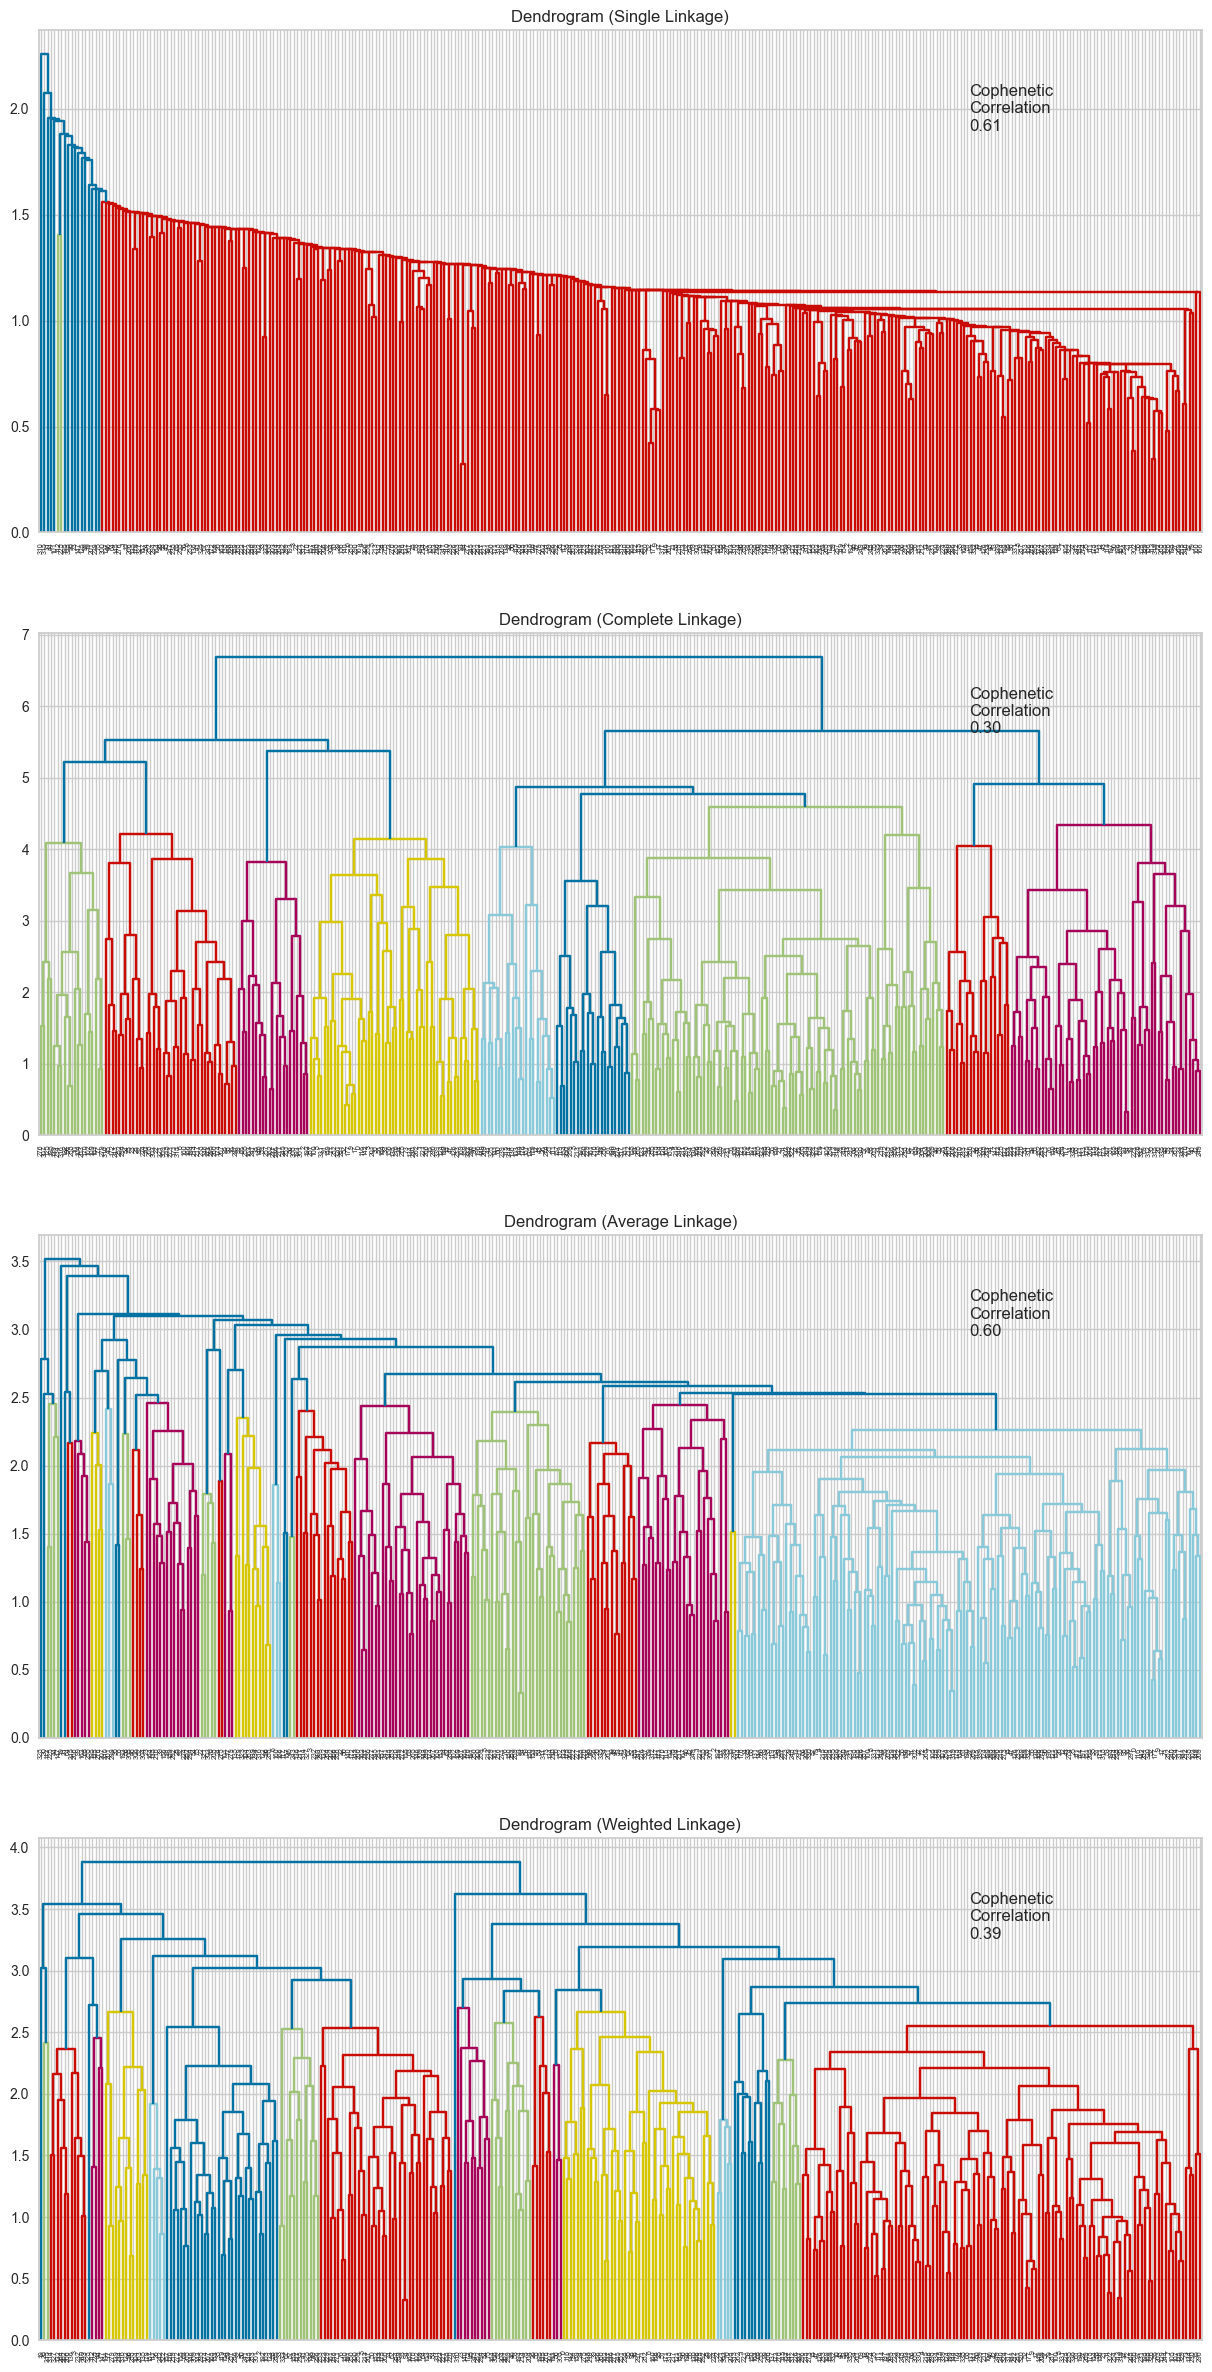

In [68]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data, metric="chebyshev", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations :** 
- The cophenetic correlation is highest for average and single linkage methods.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Building model using optimal k value and single linkage

In [69]:
HCmodel = AgglomerativeClustering(n_clusters=3, metric="chebyshev", linkage="single")
HCmodel.fit(data)

AgglomerativeClustering(linkage='single', metric='chebyshev', n_clusters=3)

In [70]:
data["HC_Clusters"] = HCmodel.labels_
data1["HC_Clusters"] = HCmodel.labels_

In [71]:
data1['HC_Clusters'].value_counts()

HC_Clusters
0    338
1      1
2      1
Name: count, dtype: int64

**Observations :** There are 338 points related to 0 cluster and 1 related to 1 and 1 related to 2nd cluster 

### Cluster profiling

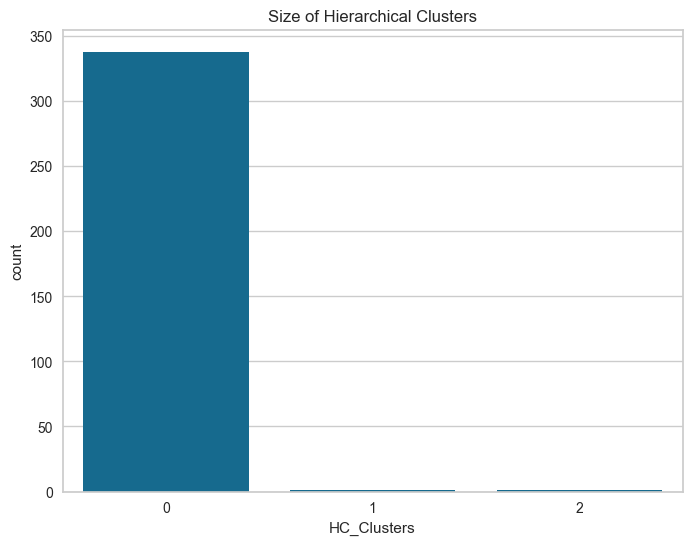

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HC_Clusters', data=data1)
plt.title('Size of Hierarchical Clusters')
plt.show()

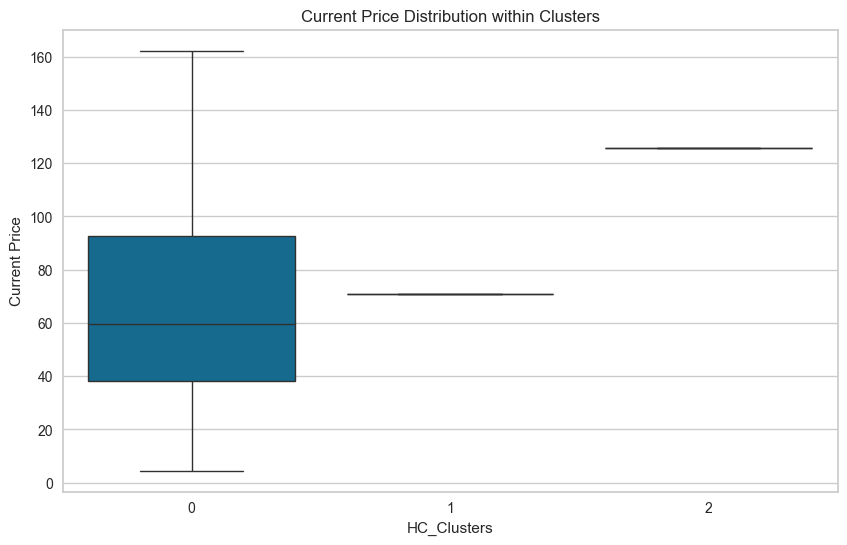

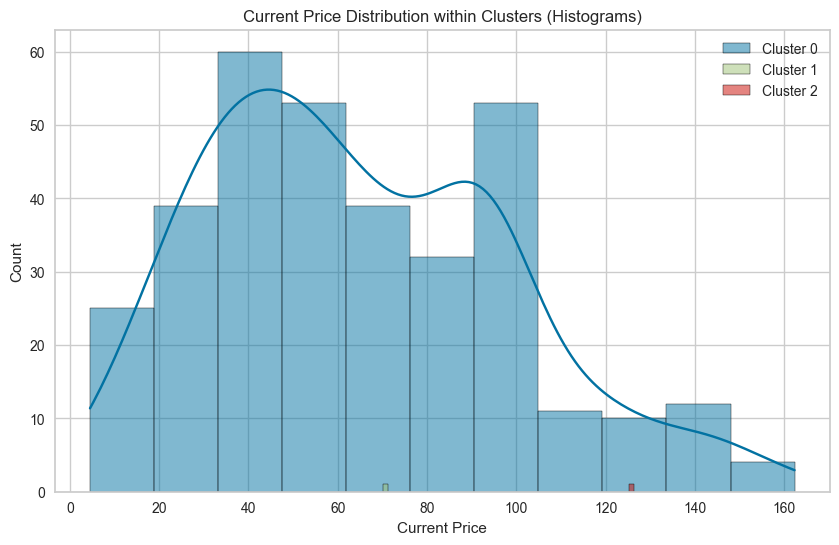

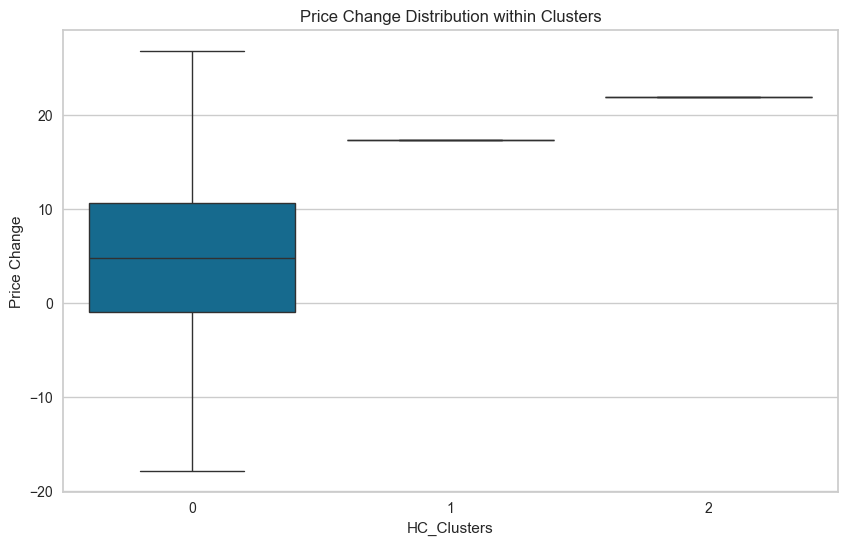

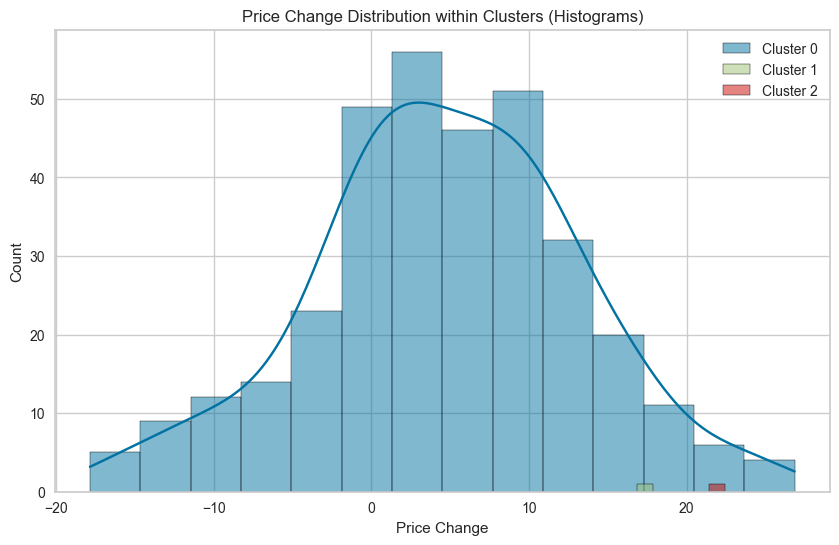

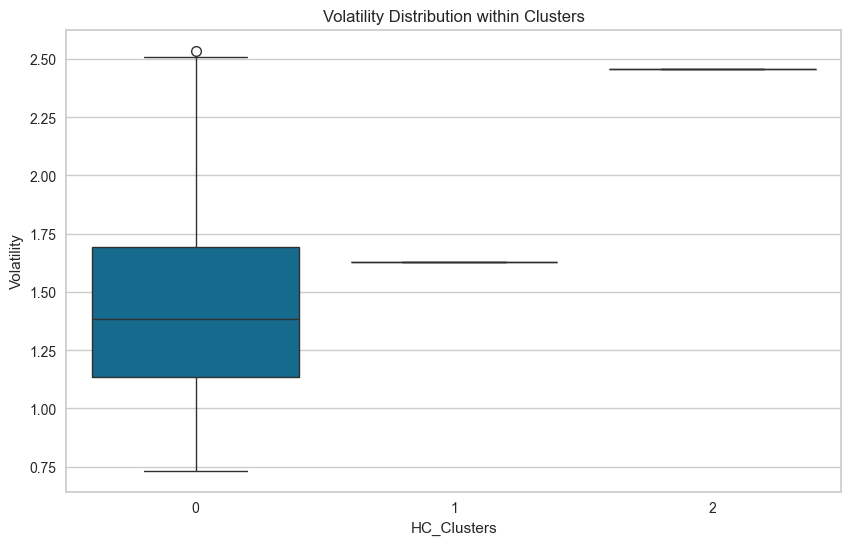

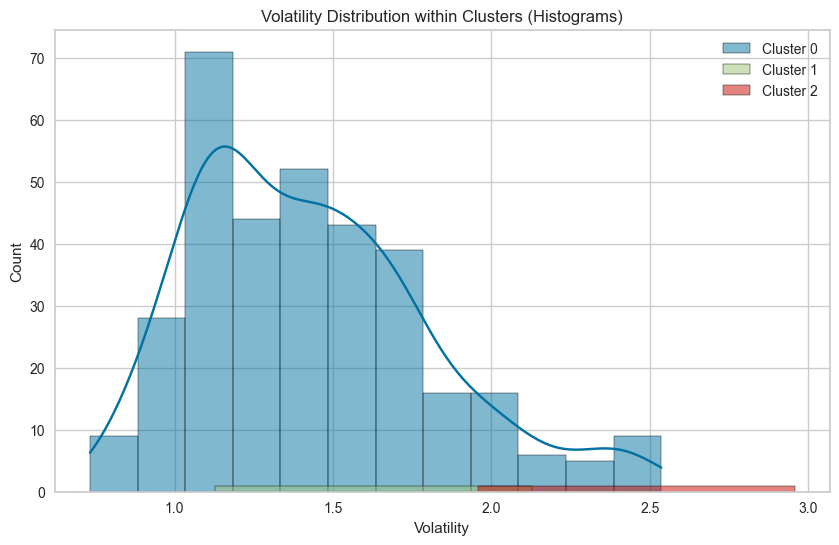

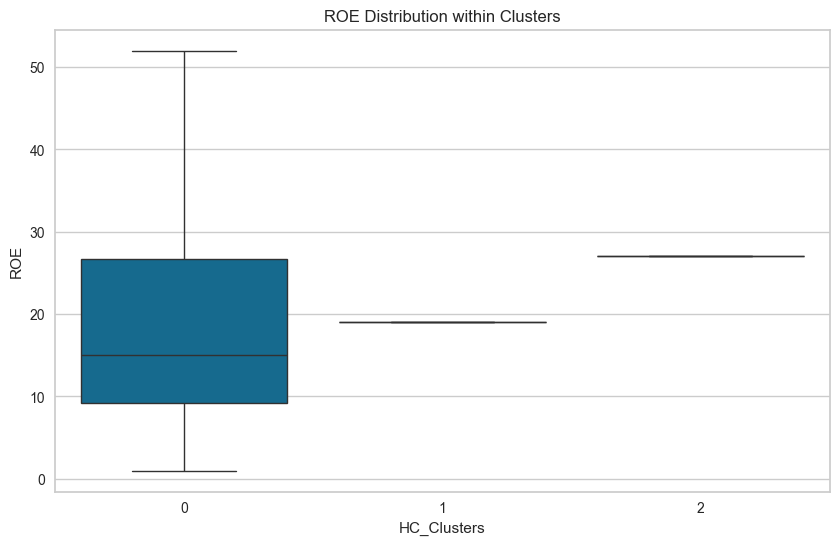

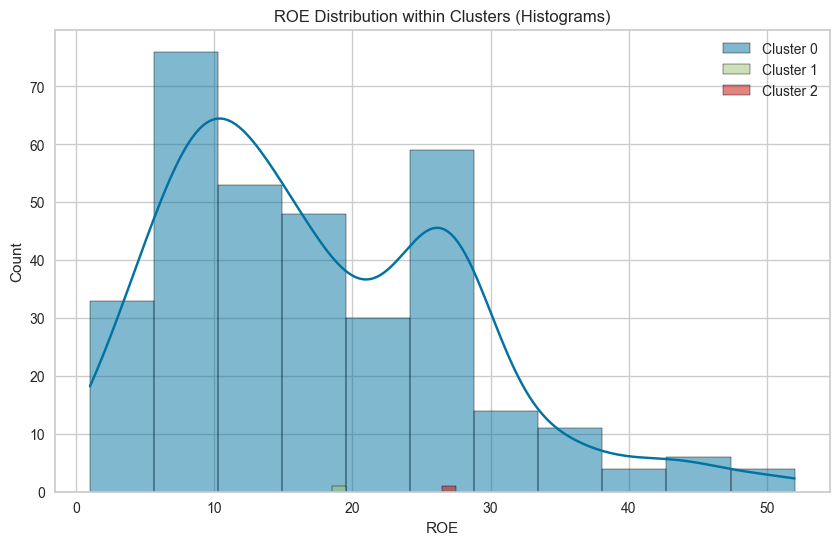

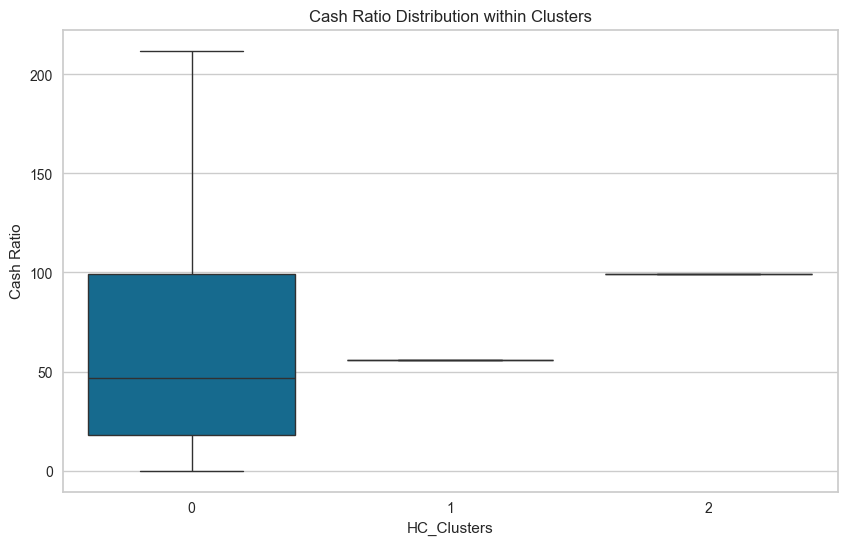

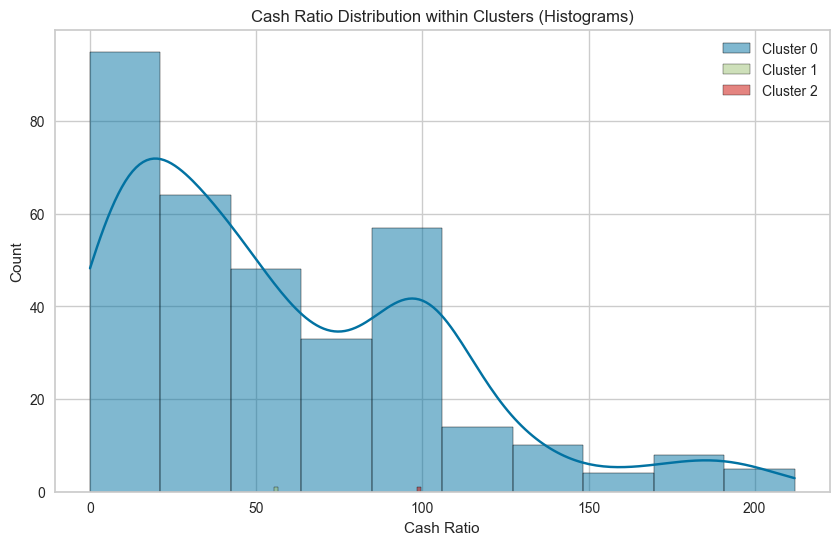

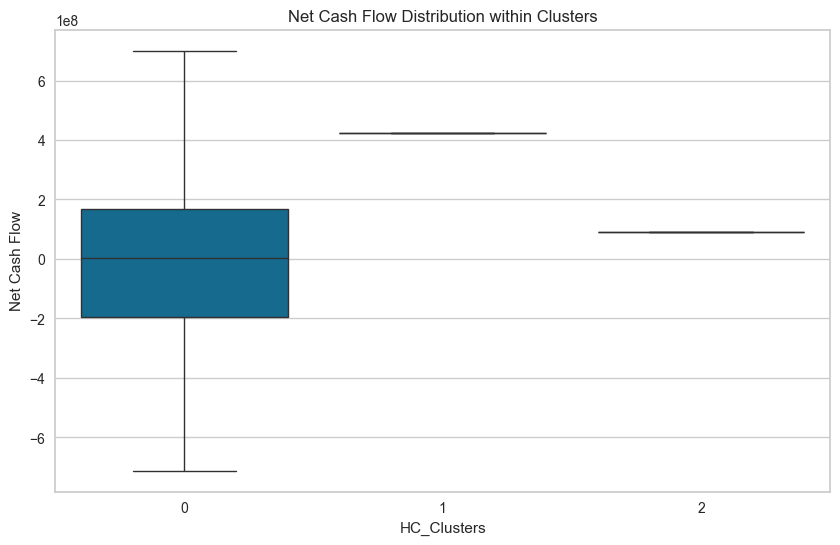

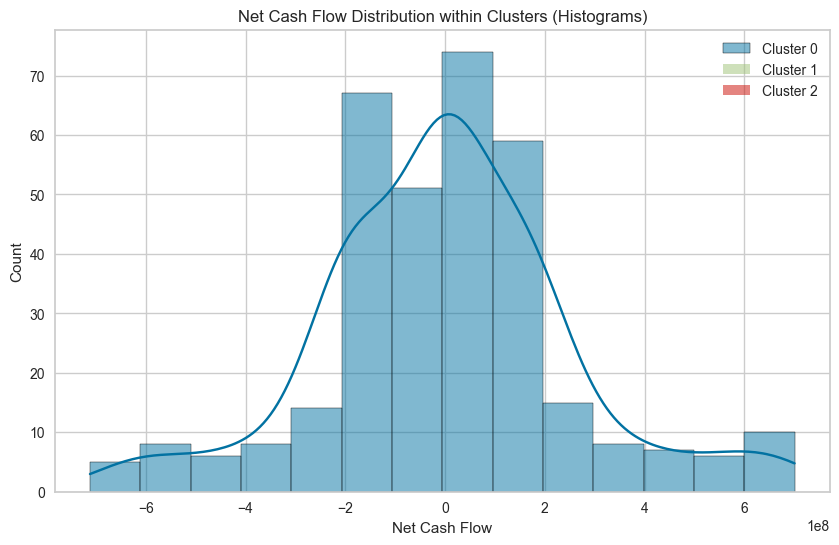

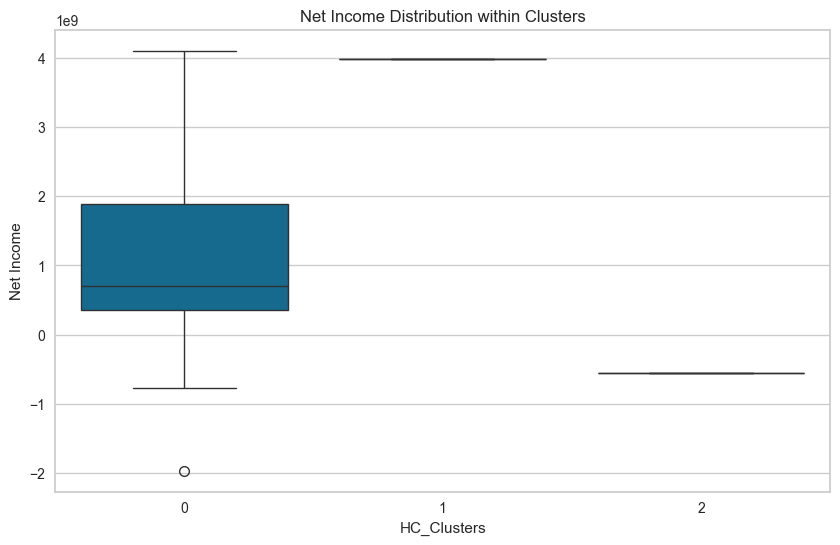

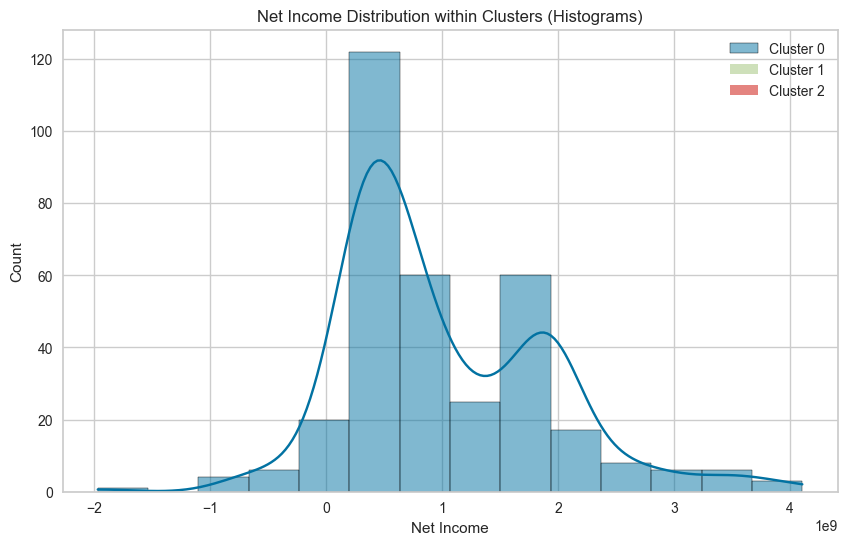

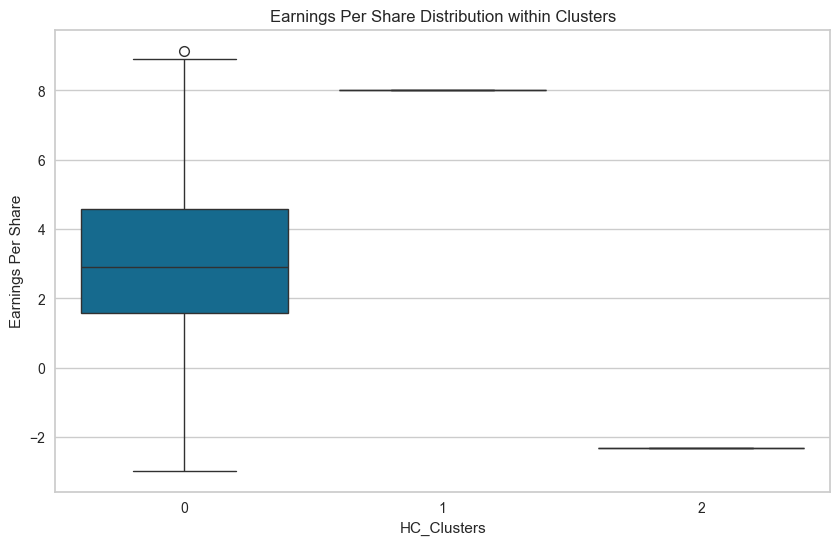

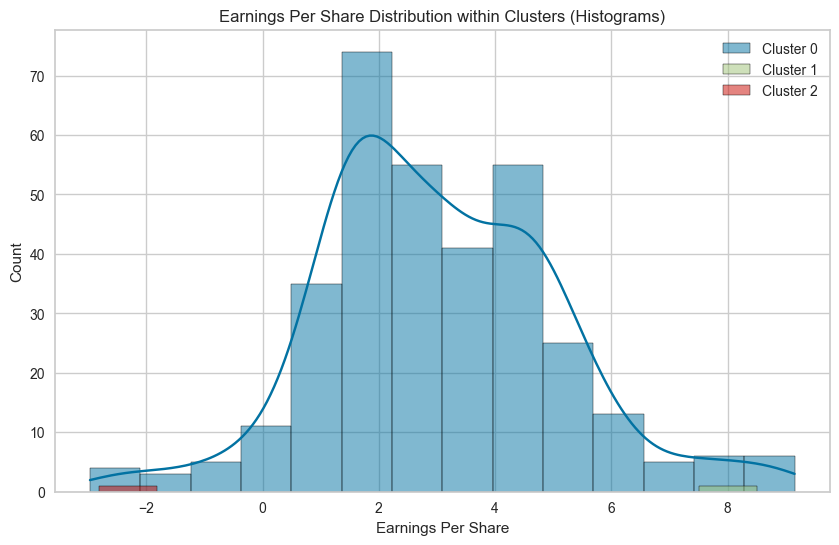

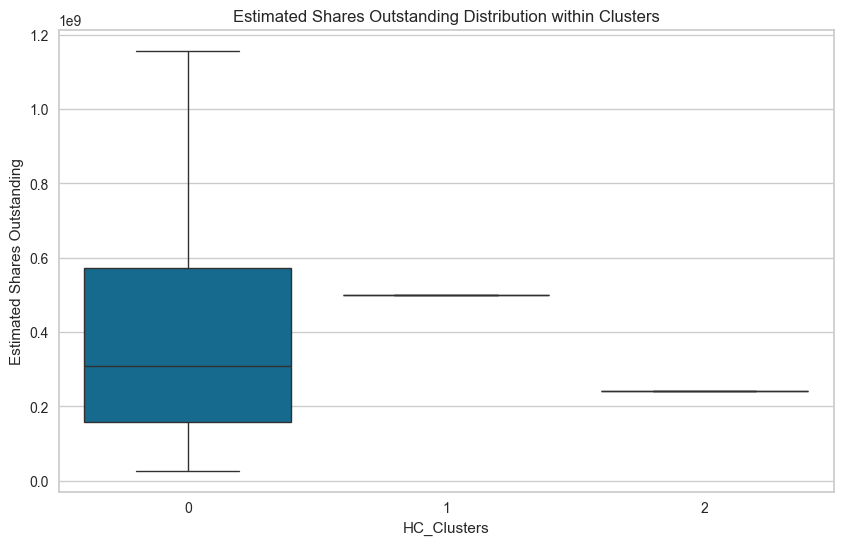

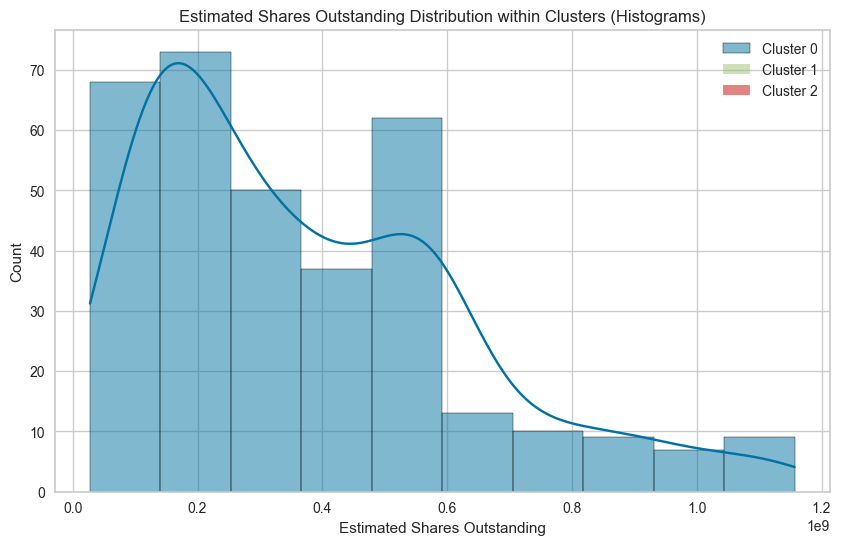

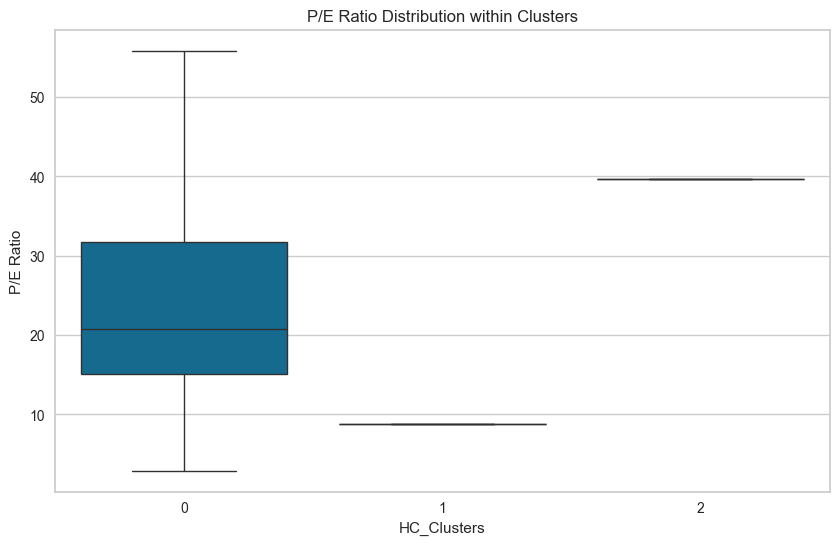

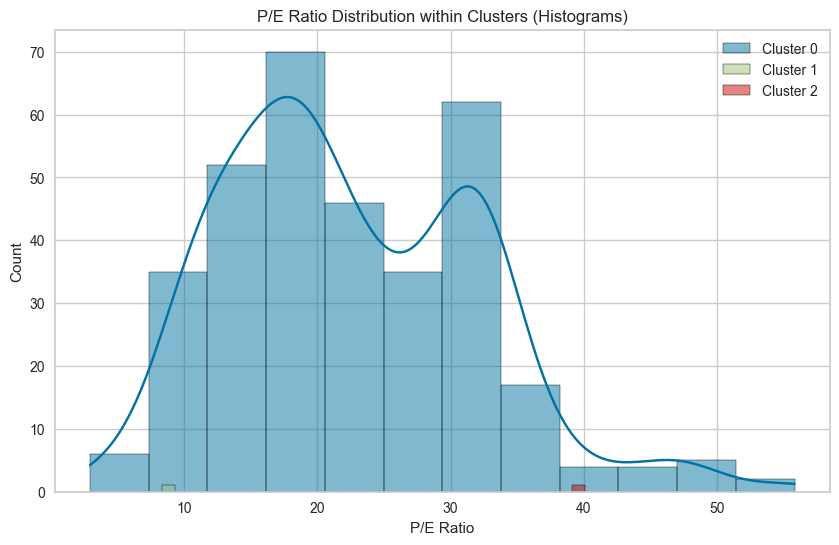

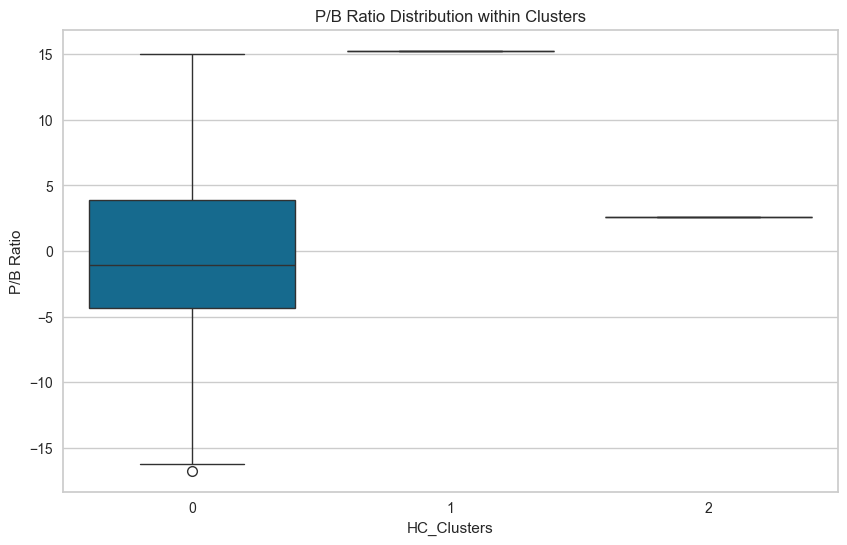

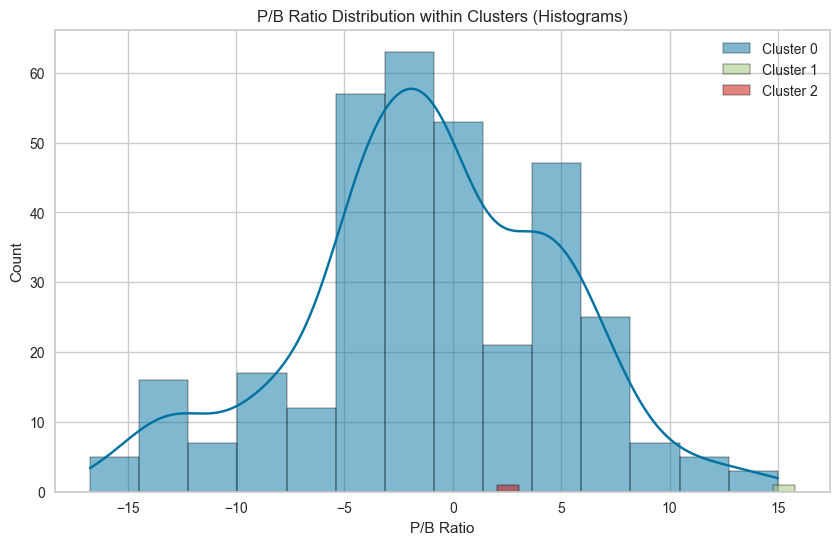

In [73]:
numerical_cols = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 
                  'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                  'P/E Ratio', 'P/B Ratio']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='HC_Clusters', y=col, data=data1)  # Box plots by cluster
    plt.title(f'{col} Distribution within Clusters')
    plt.show()

    # Add histograms for each cluster
    plt.figure(figsize=(10, 6))
    for cluster in data1['HC_Clusters'].unique():
        cluster_data = data1[data1['HC_Clusters'] == cluster][col]
        sns.histplot(cluster_data, kde=True, label=f'Cluster {cluster}')
    plt.title(f'{col} Distribution within Clusters (Histograms)')
    plt.legend()
    plt.show()

**Observations :** 
- Price change is similar in median but more volatile in Cluster 1
- Cluster 1 shows higher ROE, with Cluster 2 having the highest
- Cluster 1 consistently shows higher mean values for most metrics
- Cluster 1 shows higher ROE

## K-means vs Hierarchical Clustering

**K-Means Performance:**
- The optimal number of clusters (k) for K-means was determined as 2 based on a high silhouette score.
- As the number of clusters increases, distortion decreases, but the silhouette score also drops and it is producing a well separated clusters.


**Hierarchical clustering:** 
- Based on dendrogram analysis, the optimal number of clusters is 3.
- Single linkage performs better in terms of cophenetic correlation but creates biased relations by grouping most points into one cluster.
- Average linkage gives better cluster distribution with a high cophenetic correlation compared to single linkage.

**Final model selection:**
- K-means is better suited with well-separated clusters and works efficiently with this data than Hierarchical clustering.

## Business Recommendations

- Using clustering to identify the best stocks for short-term trading vs. long-term investment.
- Recognize which sectors perform well in different market conditions and adjust investments accordingly.
- Identifying sector-specific trends and predict future market movements
- Identifying stock clusters that align with emerging markets or innovative industries for business expansion.
- Building AI-driven investment platforms that recommend stocks based on similar investor risk profiles.
- Identifying companies in similar clusters that could be good candidates for strategic partnerships or acquisitions